In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['SimHei']
%matplotlib inline
plt.style.use('bmh')
import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv(r"D:/桌面/数据与代码/AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [33]:
# Order列理论上没有任何信息，删除
df = df.drop(columns=['Order'])

有缺失值的列的比例：0.3333333333333333
缺失值统计：
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64


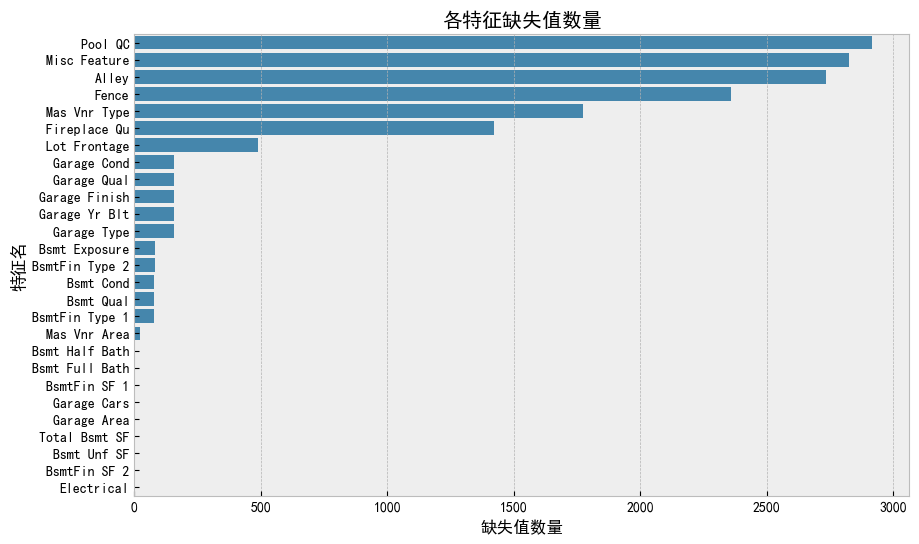

数据集总行数: 2930
重复行数: 0

各变量类型统计：
object     43
int64      27
float64    11
Name: count, dtype: int64

各变量类型详情：
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 81, dtype: object

数值型变量(37): ['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']

分类型变量(4

In [34]:
# 1. 查看缺失值情况
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(f'有缺失值的列的比例：{len(missing)/len(df.columns)}')
print("缺失值统计：")
print(missing)

# 2. 缺失值比例可视化
plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, orient='h')
plt.title('各特征缺失值数量')
plt.xlabel('缺失值数量')
plt.ylabel('特征名')
plt.show()

# 3. 查看重复值
print(f"数据集总行数: {df.shape[0]}")
print(f"重复行数: {df.duplicated().sum()}")

# 如果有重复行，可以选择删除
df = df.drop_duplicates()

# 4. 查看变量类型
print("\n各变量类型统计：")
print(df.dtypes.value_counts())
print("\n各变量类型详情：")
print(df.dtypes)

# 5. 数值型和分类型变量分离
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('SalePrice') # 删除目标变量，因为目标变量不能作为特征
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\n数值型变量({len(num_cols)}): {num_cols}")
print(f"\n分类型变量({len(cat_cols)}): {cat_cols}")

Pool QC 填充为 None
Fireplace Qu 填充为 None
Alley 填充为 None
Fence 填充为 None
Misc Feature 填充为 None
Garage Qual 填充为 None
Garage Cond 填充为 None
Garage Yr Blt 填充为 0
Garage Finish 填充为 None
Garage Type 填充为 None
Bsmt Exposure 填充为 None
BsmtFin Type 1 填充为 None
BsmtFin Type 2 填充为 None
Bsmt Cond 填充为 None
Bsmt Qual 填充为 None
Mas Vnr Type 填充为 None
Mas Vnr Area 填充为 0
有缺失值的列的比例：0.12345679012345678
缺失值统计：
Lot Frontage      490
Bsmt Full Bath      2
Bsmt Half Bath      2
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
Garage Cars         1
Garage Area         1
dtype: int64


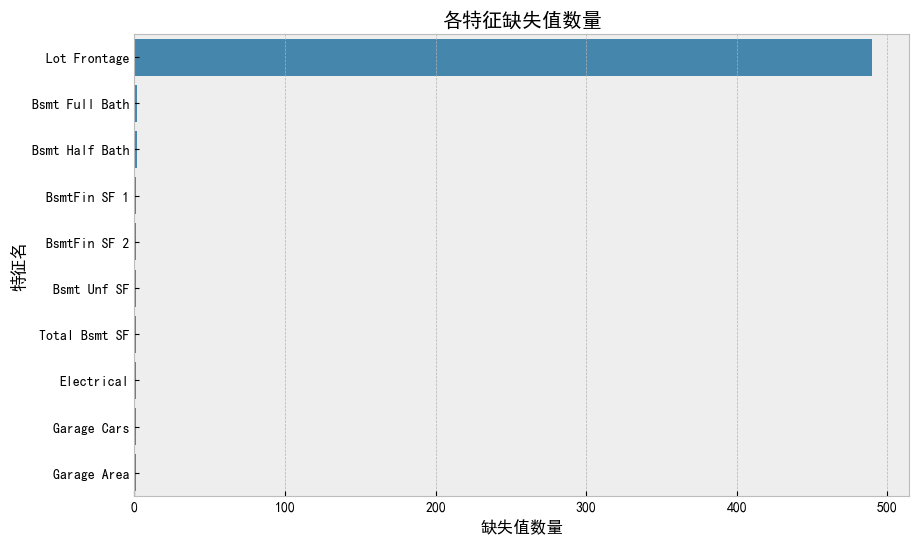

In [35]:
# 缺失值处理，一部分缺失值本身就反映信息，需要多添加一个水平，有些可以填充
# 这些变量的缺失值本身就代表“没有该设施”
missing_meaningful_cols = [
    'Pool QC', 'Fireplace Qu', 'Alley', 'Fence', 'Misc Feature',
    'Garage Qual', 'Garage Cond', 'Garage Yr Blt', 'Garage Finish', 'Garage Type',
    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Cond', 'Bsmt Qual',
    'Mas Vnr Type', 'Mas Vnr Area'
]
# 先处理类别型,再处理数值型,因为数值型可能存在0,而类别型不存在0,所以先处理类别型
for col in missing_meaningful_cols:
    if col in cat_cols:
        print(f'{col} 填充为 None')
        df[col] = df[col].fillna('None')
    elif col in num_cols:
        print(f'{col} 填充为 0')
        df[col] = df[col].fillna(0)
    else:
        print(f'{col} 未处理')

# 再查看缺失值情况
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(f'有缺失值的列的比例：{len(missing)/len(df.columns)}')
print("缺失值统计：")
print(missing)

# 缺失值比例可视化
plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, orient='h')
plt.title('各特征缺失值数量')
plt.xlabel('缺失值数量')
plt.ylabel('特征名')
plt.show()

In [36]:

# === 新增：删除缺失值占比超过30%的特征列 ===
thresh = 0.3  # 阈值
missing_ratio = df.isnull().mean()
drop_cols = missing_ratio[missing_ratio > thresh].index.tolist()
print(f"\n将要删除的缺失值占比超过30%的列: {drop_cols}")
df = df.drop(columns=drop_cols)



将要删除的缺失值占比超过30%的列: []


In [37]:
# === 新增：划分训练集和测试集（在缺失值填充之前） ===
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
print(f"\n训练集样本数: {train_df.shape[0]}, 测试集样本数: {test_df.shape[0]}")


训练集样本数: 2051, 测试集样本数: 879


In [38]:

# 2. 计算训练集的中位数和众数
num_median = train_df[num_cols].median()
print(num_median)
cat_mode = train_df[cat_cols].mode().iloc[0]  # mode()返回DataFrame，取第一行
print(cat_mode)

# 3. 用训练集统计量填充缺失值
# 训练集
train_df[num_cols] = train_df[num_cols].fillna(num_median)
train_df[cat_cols] = train_df[cat_cols].fillna(cat_mode)
# 测试集
test_df[num_cols] = test_df[num_cols].fillna(num_median)
test_df[cat_cols] = test_df[cat_cols].fillna(cat_mode)


PID                535454050.0
MS SubClass               50.0
Lot Frontage              68.0
Lot Area                9360.0
Overall Qual               6.0
Overall Cond               5.0
Year Built              1972.0
Year Remod/Add          1992.0
Mas Vnr Area               0.0
BsmtFin SF 1             375.5
BsmtFin SF 2               0.0
Bsmt Unf SF              460.0
Total Bsmt SF            988.0
1st Flr SF              1082.0
2nd Flr SF                 0.0
Low Qual Fin SF            0.0
Gr Liv Area             1440.0
Bsmt Full Bath             0.0
Bsmt Half Bath             0.0
Full Bath                  2.0
Half Bath                  0.0
Bedroom AbvGr              3.0
Kitchen AbvGr              1.0
TotRms AbvGrd              6.0
Fireplaces                 1.0
Garage Yr Blt           1977.0
Garage Cars                2.0
Garage Area              478.0
Wood Deck SF               0.0
Open Porch SF             26.0
Enclosed Porch             0.0
3Ssn Porch                 0.0
Screen P

In [39]:
# # 7. 简单异常值检测（以Z-score为例）
# from scipy.stats import zscore
# z_scores = zscore(df[num_cols])
# outliers = (abs(z_scores) > 3).sum(axis=0)
# print("\n每个数值型变量的异常值数量（Z-score>3）：")
# for col, count in zip(num_cols, outliers):
#     print(f"{col}: {count}")

# 统计训练集和测试集的缺失值和重复行
print("训练集缺失值总数：", train_df.isnull().sum().sum())
print("训练集重复行数：", train_df.duplicated().sum())
print("测试集缺失值总数：", test_df.isnull().sum().sum())
print("测试集重复行数：", test_df.duplicated().sum())

训练集缺失值总数： 0
训练集重复行数： 0
测试集缺失值总数： 0
测试集重复行数： 0


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


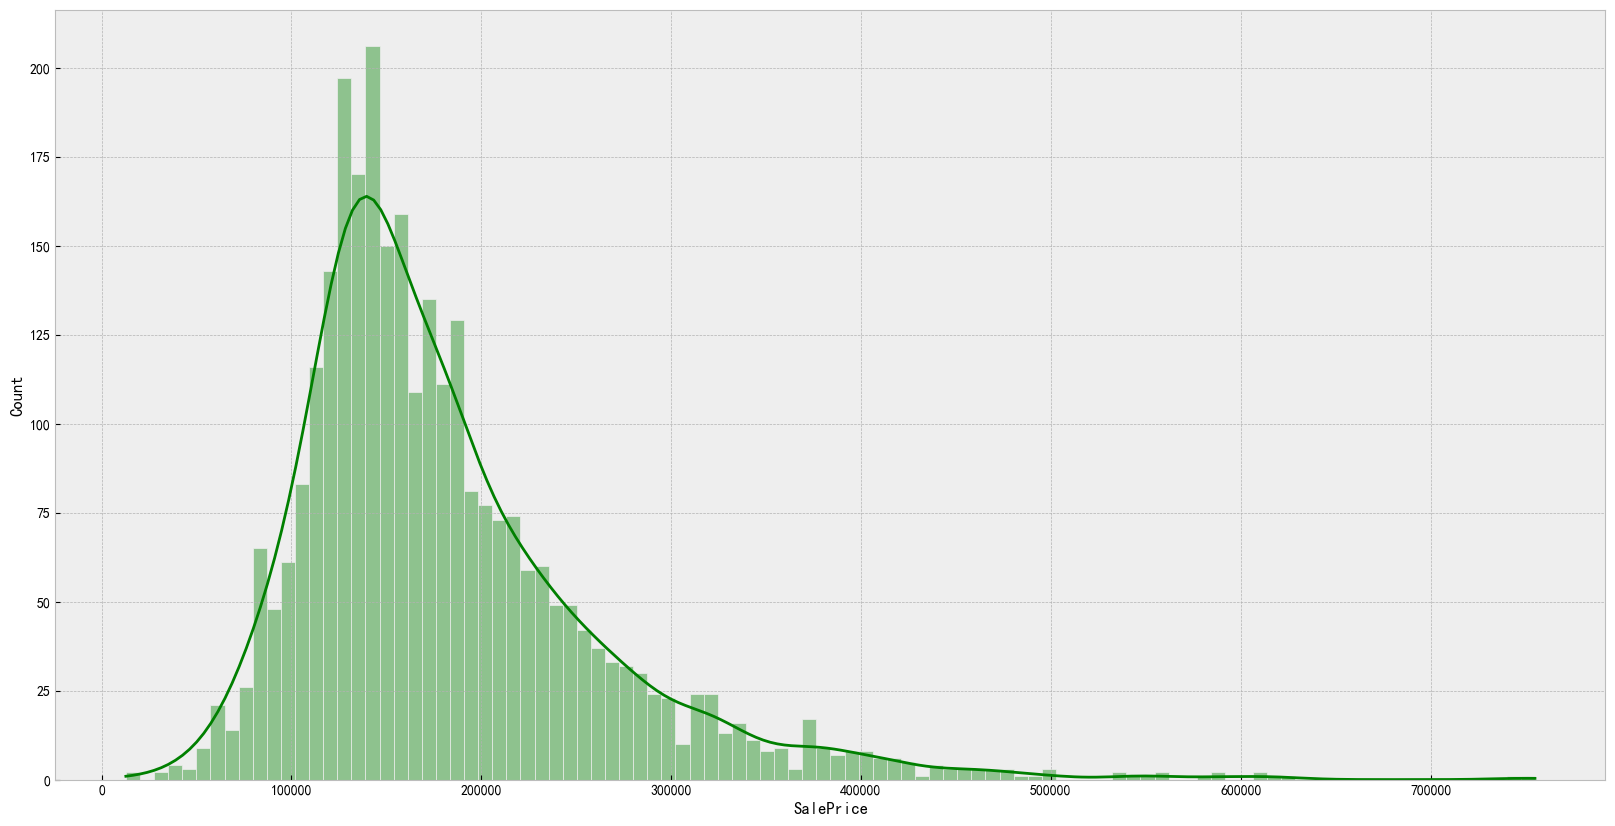

In [40]:
print(df['SalePrice'].describe())
plt.figure(figsize=(20, 10))
sns.histplot(df['SalePrice'], color='g', bins=100, alpha=0.4, kde=True)
plt.show()

In [41]:
# 检查测试集是否存在“未知标签”，后续要注意处理
for col in cat_cols:
    train_levels = set(train_df[col].dropna().unique())
    test_levels = set(test_df[col].dropna().unique())
    unknown_levels = test_levels - train_levels
    if unknown_levels:
        print(f"特征 {col} 测试集有未知类别。")

特征 Roof Matl 测试集有未知类别。
特征 Exterior 1st 测试集有未知类别。
特征 Exterior 2nd 测试集有未知类别。
特征 Kitchen Qual 测试集有未知类别。
特征 Pool QC 测试集有未知类别。
特征 Misc Feature 测试集有未知类别。
特征 Sale Type 测试集有未知类别。


In [42]:
# 目标条件均值编码
mean_cols = []
for col in cat_cols:
    means = train_df.groupby(col)['SalePrice'].mean()
    new_col = col + '_mean'
    mean_cols.append(new_col)
    train_df[new_col] = train_df[col].map(means)
    # 测试集未知类别用训练集全局均值
    global_mean = train_df['SalePrice'].mean()
    test_df[new_col] = test_df[col].map(means).fillna(global_mean)

In [43]:
# 频率编码
freq_cols = []
for col in cat_cols:
    freqs = train_df[col].value_counts(normalize=True)
    new_col = col + '_freq'
    freq_cols.append(new_col)
    train_df[new_col] = train_df[col].map(freqs)
    test_df[new_col] = test_df[col].map(freqs).fillna(0)

In [44]:
# 2. 打印非数值型变量的训练集水平数（即唯一值数量)
print("非数值型变量及其水平数：")
for col in cat_cols:
    print(f"{col}: 水平分别为{train_df[col].unique()}，共{train_df[col].nunique()} 个水平")

非数值型变量及其水平数：
MS Zoning: 水平分别为['RH' 'RL' 'RM' 'FV' 'I (all)' 'C (all)' 'A (agr)']，共7 个水平
Street: 水平分别为['Pave' 'Grvl']，共2 个水平
Alley: 水平分别为['None' 'Pave' 'Grvl']，共3 个水平
Lot Shape: 水平分别为['Reg' 'IR1' 'IR2' 'IR3']，共4 个水平
Land Contour: 水平分别为['HLS' 'Low' 'Lvl' 'Bnk']，共4 个水平
Utilities: 水平分别为['AllPub' 'NoSewr' 'NoSeWa']，共3 个水平
Lot Config: 水平分别为['Inside' 'Corner' 'CulDSac' 'FR2' 'FR3']，共5 个水平
Land Slope: 水平分别为['Gtl' 'Sev' 'Mod']，共3 个水平
Neighborhood: 水平分别为['Crawfor' 'ClearCr' 'Gilbert' 'Blueste' 'Blmngtn' 'OldTown' 'Edwards'
 'Mitchel' 'Sawyer' 'NridgHt' 'BrkSide' 'NAmes' 'Somerst' 'CollgCr'
 'SWISU' 'BrDale' 'NPkVill' 'MeadowV' 'NWAmes' 'IDOTRR' 'Timber' 'NoRidge'
 'SawyerW' 'StoneBr' 'Greens' 'Veenker' 'Landmrk' 'GrnHill']，共28 个水平
Condition 1: 水平分别为['Norm' 'Feedr' 'Artery' 'RRAn' 'PosA' 'PosN' 'RRAe' 'RRNn' 'RRNe']，共9 个水平
Condition 2: 水平分别为['Norm' 'RRNn' 'RRAe' 'PosA' 'Feedr' 'PosN' 'Artery' 'RRAn']，共8 个水平
Bldg Type: 水平分别为['Duplex' '1Fam' 'TwnhsE' '2fmCon' 'Twnhs']，共5 个水平
House Style: 水平分别为['2St

In [45]:
# 用编码映射对有序变量进行编码
order_cols = []
# 质量/条件类（含None）
qual_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# Land Slope
land_slope_map = {'None': 0, 'Gtl': 1, 'Mod': 2, 'Sev': 3}
# Lot Shape
lot_shape_map = {'None': 0, 'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}
# Bsmt Exposure
bsmt_exposure_map = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
# Garage Finish
garage_finish_map = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
# Paved Drive
paved_drive_map = {'None': 0, 'N': 1, 'P': 2, 'Y': 3}

# 以train_df和test_df为例
for col, mapping in [
    ('Exter Qual', qual_map),
    ('Exter Cond', qual_map),
    ('Bsmt Qual', qual_map),
    ('Bsmt Cond', qual_map),
    ('Heating QC', qual_map),
    ('Kitchen Qual', qual_map),
    ('Fireplace Qu', qual_map),
    ('Garage Qual', qual_map),
    ('Garage Cond', qual_map),
    ('Pool QC', qual_map),
    ('Land Slope', land_slope_map),
    ('Lot Shape', lot_shape_map),
    ('Bsmt Exposure', bsmt_exposure_map),
    ('Garage Finish', garage_finish_map),
    ('Paved Drive', paved_drive_map),
]:
    if col in train_df.columns:
        new_col = col + '_ord'
        order_cols.append(new_col)
        train_df[new_col] = train_df[col].map(mapping)
        test_df[new_col] = test_df[col].map(mapping)
    else:
        print(f"特征 {col} 不存在于训练集中")

In [46]:
train_df.columns.tolist()

['PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'G

In [47]:
from scipy.stats import rankdata
import numpy as np

def rank_minmax_encode(train_df, test_df, cols, suffix='_rank'):
    '''
    对数值型变量或者已转化为数值型的分类型变量进行秩编码和min-
    max归一化，并返回训练集和测试集的编码结果，因为只要是数就可以这样做
    返回只包含新特征的DataFrame，便于后续拼接。
    '''
    train_encoded = pd.DataFrame(index=train_df.index)
    test_encoded = pd.DataFrame(index=test_df.index)
    for col in cols:
        # 训练集秩编码
        train_ranks = rankdata(train_df[col], method='average')  # 从1开始
        min_rank = train_ranks.min()
        max_rank = train_ranks.max()
        # 归一化
        train_encoded[col + suffix] = (train_ranks - min_rank) / (max_rank - min_rank)
        
        # 测试集秩编码
        test_ranks = []
        train_col = train_df[col].values
        for val in test_df[col]:
            # 合并训练集和当前测试样本，计算秩
            concat = np.append(train_col, val)
            rank = rankdata(concat, method='average')[-1]  # 取最后一个（即测试样本的秩）
            # 用训练集的min/max归一化
            norm_rank = (rank - min_rank) / (max_rank - min_rank)
            test_ranks.append(norm_rank)
        test_encoded[col + suffix] = test_ranks
    return train_encoded, test_encoded

rank_cols = num_cols + mean_cols + freq_cols
train_ranked, test_ranked = rank_minmax_encode(train_df, test_df, rank_cols)
print("数值型变量与已转化为数值型的分类型变量已完成秩编码和min-max归一化。")

数值型变量与已转化为数值型的分类型变量已完成秩编码和min-max归一化。


In [48]:
from sklearn.preprocessing import StandardScaler
# 去掉原始cat_cols
train_df = train_df.drop(columns=cat_cols)
test_df = test_df.drop(columns=cat_cols)

scaler_num = StandardScaler()
# 标准化时只用训练集的均值和方差，测试集用训练集参数变换，防止信息泄露。
train_df[num_cols] = scaler_num.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler_num.transform(test_df[num_cols])

scaler_mean = StandardScaler()
train_df[mean_cols] = scaler_mean.fit_transform(train_df[mean_cols])
test_df[mean_cols] = scaler_mean.transform(test_df[mean_cols])

scaler_freq = StandardScaler()
train_df[freq_cols] = scaler_freq.fit_transform(train_df[freq_cols])
test_df[freq_cols] = scaler_freq.transform(test_df[freq_cols])

scaler_ord = StandardScaler()
train_df[order_cols] = scaler_ord.fit_transform(train_df[order_cols])
test_df[order_cols] = scaler_ord.transform(test_df[order_cols])

In [49]:
train_df = pd.concat([train_df, train_ranked], axis=1)
test_df = pd.concat([test_df, test_ranked], axis=1)

In [50]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 2210 to 860
Columns: 262 entries, PID to Sale Condition_freq_rank
dtypes: float64(261), int64(1)
memory usage: 4.1 MB
<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 1357 to 342
Columns: 262 entries, PID to Sale Condition_freq_rank
dtypes: float64(261), int64(1)
memory usage: 1.8 MB


In [51]:
# 检查是不是所有变量都为数值型了
# 检查训练集
cat_cols_left = train_df.select_dtypes(include=['object']).columns.tolist()
print("训练集剩余的非数值型变量：", cat_cols_left)

# 检查测试集
cat_cols_left_test = test_df.select_dtypes(include=['object']).columns.tolist()
print("测试集剩余的非数值型变量：", cat_cols_left_test)

训练集剩余的非数值型变量： []
测试集剩余的非数值型变量： []


In [52]:
# 把因变量换到最后
# 对训练集
sale_col = 'SalePrice'
cols = [col for col in train_df.columns if col != sale_col] + [sale_col]
train_df = train_df[cols]

# 对测试集（如果有SalePrice）
if sale_col in test_df.columns:
    cols_test = [col for col in test_df.columns if col != sale_col] + [sale_col]
    test_df = test_df[cols_test]

In [53]:
# 导出为csv
train_df.to_csv("D:/桌面/数据与代码/train1.csv", index=False)
test_df.to_csv("D:/桌面/数据与代码/test1.csv", index=False)

以下是普通牛顿法

In [54]:
class interior_optimization():
    def __init__(self, X, y, beta,lambda_0,converge_limit_2,  max_iter_outer,sigma):
        """
        牛顿法
        X，y：数据集
        beta：参数向量，是热启动得到的初值
        lambda_0：正则项超参数

        """
        self.parameters = {
            'converge_limit_2': converge_limit_2,##内部循环收敛条件
            'max_iter_outer': max_iter_outer
        }
        self.max_backtracking =4  # 最大回溯步长搜索次数 
        self.converge_limit_2 = converge_limit_2
        self.max_iter_outer = max_iter_outer
        self.sigma = sigma
        self.lambda_0 = lambda_0
        self.X = X
        self.y = y
        self.beta = beta
        self.mse_history = [] 
        self.H = np.eye(X.shape[1])  # 初始化近似海森矩阵逆为单位矩阵
        self.loss_history = []        # 记录总损失历史
        return None
    def loss_MSE(self, beta=None):
        """
        Compute the Mean Squared Error (MSE) loss.
        If `beta` is provided, use it; otherwise use self.beta.
        """
        X = self.X
        y = self.y
        n = len(y)
        
        # 动态选择 beta 来源
        if beta is None:
            beta = self.beta  # 默认使用类属性
        else:
            beta = beta       # 使用传入的参数
        
        # 计算 MSE
        return (1 / n) * np.sum((y - X @ beta) ** 2)
    def loss_kernal(self,beta=None):
        """
        Compute the L0 loss.
        """
        # 动态选择 beta 来源
        if beta is None:
            beta = self.beta  # 默认使用类属性
        else:
            beta = beta       # 使用传入的参数
        X = self.X
        y = self.y
        p = 0
        sigma = self.sigma
        k = [0] * len(self.beta)  # Initialize k as a list of zeros
        for i in range(len(beta)):  # 修改为从0开始
            if 0 < beta[i] < sigma:   # 注意：beta[i] 是一个标量（形状为(1,)的数组？或者标量？）
                # 如果beta[i]是数组（形状为(1,)），则需要索引[0]，或者使用item()
                if isinstance(beta[i], np.ndarray) and beta[i].size == 1:
                    beta_val = beta[i].item()
                else:
                    beta_val = beta[i]
                # 现在用beta_val判断
                if 0 < beta_val < sigma:
                    k[i] = (sigma - beta_val) / sigma
                elif -sigma < beta_val < 0:
                    k[i] = (sigma + beta_val) / sigma
                else:
                    k[i] = 0
            else:
                k[i] = 0
            p += k[i]
        # 打印p的类型
        #print(f"p的类型: {type(p)}")
        #print(f"当前的惩罚项值为：{p}")
        return len(self.beta)-p
    def loss(self,beta=None):
        """
        Compute the total loss, which is the sum of MSE and the penalty term.
        """
        # 动态选择 beta 来源
        if beta is None:
            beta = self.beta  # 默认使用类属性
        else:
            beta = beta
        X = self.X
        y = self.y
        mse_loss = self.loss_MSE(beta)  # 使用传入的 beta 或类属性 beta
        penalty_loss = self.loss_kernal(beta)
        return mse_loss + self.lambda_0 * penalty_loss
    def Hessian(self):##计算交叉熵损失函数的海森矩阵
        X = self.X
        y = self.y
        n=len(self.y)
        return (2/n)*self.X.T @ self.X
    def grad_MSE(self,beta=None):##计算交叉熵损失函数的梯度   
        X = self.X
        y = self.y
        if beta is None:
            beta = self.beta  # 默认使用类属性
        else:
            beta = beta
        n=len(self.y)
        return (-2/n)*self.X.T @ (self.y - X @ beta)
    def grad_penalty(self, beta=None):
        if beta is None:
            beta = self.beta  # 默认使用类属性
        else:
            beta = beta
        grad_vec = np.zeros_like(beta)
        for i in range(len(beta)):
            if 0 < beta[i] < self.sigma:
                grad_vec[i] = 1/self.sigma
            elif -self.sigma < beta[i] < 0:
                grad_vec[i] = -1/self.sigma
        return -self.lambda_0 * grad_vec  # 返回向量
    def grad(self,beta=None):
        """
        Compute the gradient of the objective function.
        """
        if beta is None:
            beta = self.beta  # 默认使用类属性
        else:
            beta = beta
        grad_MSE = self.grad_MSE(beta)
        grad_penalty = self.grad_penalty(beta)
        #print(f"当前的梯度值为：{grad_MSE + grad_penalty}")
        return grad_MSE + grad_penalty
    def Newton(self):
        """
        Compute the Newton's method update.
        """
        beta= self.beta
        sigma = self.sigma
        lambda_0 = self.lambda_0
        for i in range(self.max_iter_outer):
            # 计算梯度和海森矩阵
            grad = self.grad(beta)
            H = self.Hessian()
            try:
                invH = np.linalg.inv(H + 1e-6*np.eye(H.shape[0]))  # 正则化防奇异
            except np.linalg.LinAlgError:
                print("海森矩阵奇异，使用伪逆")
                invH = np.linalg.pinv(H)
            tao=0.2##线搜索超参数
            delta = -invH @ grad
            #print(f"迭代次数: {i}, 当前梯度范数: {np.linalg.norm(grad)}, 当前损失: {self.loss(beta)}")
            for _ in range(self.max_backtracking):  # 专用步长搜索循环
                new_beta = beta + tao * delta
                current_loss = self.loss(beta)
                new_loss = self.loss(new_beta)
                #print(f"当前步长: {tao}, 当前损失: {current_loss}, 新损失: {new_loss}")
                # Armijo条件 (0.5为衰减系数)
                if new_loss <= current_loss:
                    beta = new_beta
                    #print(f"迭代次数: {i}, 步长: {tao}, 当前损失: {new_loss}")
                    break
                tao /= 10
            new_grad = self.grad(beta)
            if (1/2)*new_grad.T @ invH @ new_grad < self.converge_limit_2:
                print(f"外部循环收敛，迭代次数: {i}")
                break
            current_mse = self.loss_MSE()
            self.mse_history.append(current_mse)  # 记录MSE值
            self.beta = beta
        return beta
    def plot_mse_curve(self):
        """绘制MSE损失下降曲线"""
        if not self.mse_history:
            print("无MSE历史记录")
            return
        
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.mse_history)+1), self.mse_history, 'b-o', linewidth=2)
        plt.title("MSE损失值下降曲线", fontsize=14)
        plt.xlabel("迭代次数", fontsize=12)
        plt.ylabel("MSE损失值", fontsize=12)
        plt.grid(True)
        plt.yscale('log')  # 使用对数刻度更清晰展示变化
        plt.tight_layout()
        plt.show()
    def DFP(self):
        """
        使用DFP拟牛顿法优化参数beta
        """
        beta = self.beta.copy()
        n = beta.shape[0]
        H = np.eye(n)  # 初始近似海森逆矩阵
        
        for i in range(self.max_iter_outer):
            # 计算当前梯度
            g = self.grad(beta)
            g_norm = np.linalg.norm(g)
            
            # 记录损失值
            current_loss = self.loss(beta)
            current_mse = self.loss_MSE()
            self.loss_history.append(current_loss)
            self.mse_history.append(current_mse)
            
            # 检查收敛条件
            if g_norm < self.converge_limit_2:
                print(f"DFP收敛于 {i} 次迭代，梯度范数: {g_norm:.6f}")
                self.beta = beta
                return beta
            
            # 计算搜索方向
            d = -H @ g
            
            # 线搜索（Armijo条件）
            alpha = self.backtracking_line_search(beta, d)
            
            # 更新参数
            beta_new = beta + alpha * d
            
            # 计算梯度变化和参数变化
            g_new = self.grad(beta_new)
            s = beta_new - beta
            y = g_new - g
            
            # 更新近似海森逆矩阵 (DFP公式)
            ys = y.T @ s
            if ys > 1e-10:  # 确保分母不为零
                Hy = H @ y
                H = H - (Hy @ Hy.T) / (y.T @ Hy) + (s @ s.T) / ys
            
            # 准备下一次迭代
            beta = beta_new
        
        print(f"达到最大迭代次数 {self.max_iter_outer}")
        self.beta = beta
        return beta

    def backtracking_line_search(self, beta, d, alpha_init=1.0, rho=0.5, c=1e-4):
        """
        回溯线搜索 (Armijo条件)
        """
        alpha = alpha_init
        f_current = self.loss(beta)
        g = self.grad(beta)
        g_d = g.T @ d
        
        for _ in range(20):  # 最大20次回溯尝试
            beta_new = beta + alpha * d
            f_new = self.loss(beta_new)
            
            # Armijo条件：f_new ≤ f_current + c*alpha*g_d
            if f_new <= f_current + c * alpha * g_d:
                return alpha
            
            alpha *= rho  # 减小步长
        
        return alpha  # 返回最后尝试的步长


    

数据集样本数: 2051, 特征数: 261


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


外部循环收敛，迭代次数: 27


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


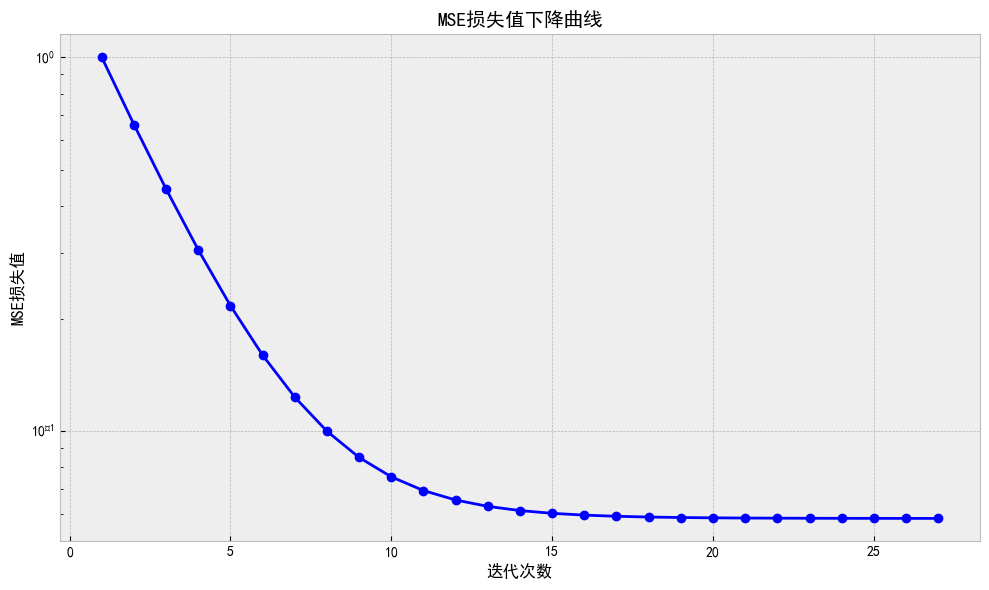


=== 优化结果 ===
初始损失值: 1.000003
最终损失值: 0.058409
迭代次数: 40

模型系数（beta）:
  beta[0]: 0.047443
  beta[1]: -0.086637
  beta[2]: 0.007119
  beta[3]: 0.051132
  beta[4]: 0.299579
  beta[5]: 0.024808
  beta[6]: 0.181239
  beta[7]: -0.060198
  beta[8]: 0.015146
  beta[9]: 1.473480
  beta[10]: 0.456683
  beta[11]: 1.118310
  beta[12]: -0.894355
  beta[13]: 0.159230
  beta[14]: 0.358487
  beta[15]: 0.007430
  beta[16]: 0.263312
  beta[17]: -0.002864
  beta[18]: -0.080003
  beta[19]: 0.102034
  beta[20]: -0.214717
  beta[21]: -0.109561
  beta[22]: -0.021179
  beta[23]: -0.043204
  beta[24]: -0.064440
  beta[25]: -0.617096
  beta[26]: 0.151112
  beta[27]: 0.056687
  beta[28]: 0.024466
  beta[29]: -0.000648
  beta[30]: 0.021224
  beta[31]: 0.011148
  beta[32]: 0.076682
  beta[33]: -0.037188
  beta[34]: -0.009166
  beta[35]: -0.042819
  beta[36]: 0.217299
  beta[37]: -0.006142
  beta[38]: -0.002910
  beta[39]: -0.004165
  beta[40]: -0.060898
  beta[41]: 0.057384
  beta[42]: -0.027588
  beta[43]: 0.00011

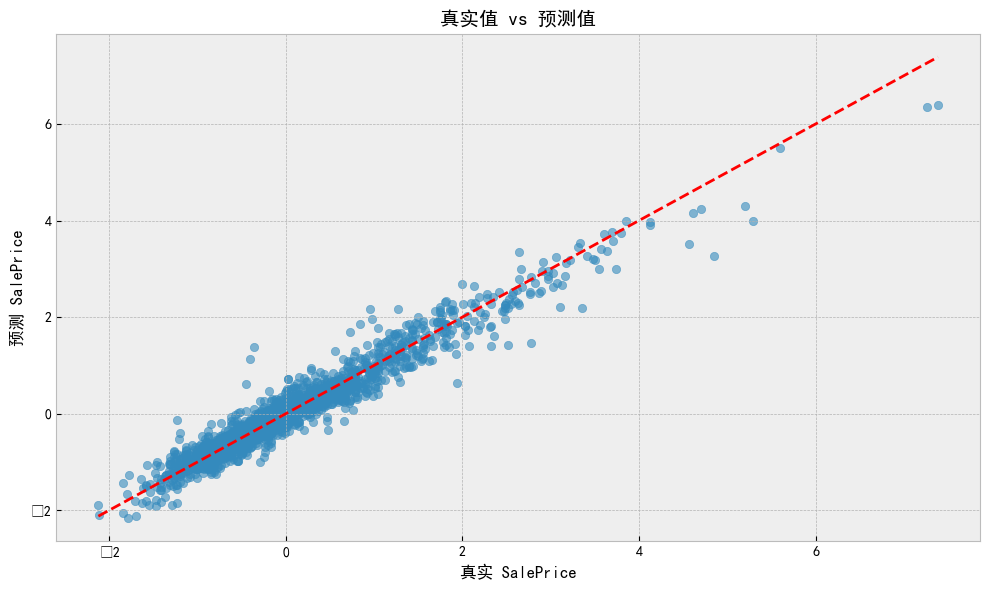


=== 测试集评估 ===
测试集总损失（包含正则化项）: 0.127793
测试集MSE（标准化尺度）: 0.127791


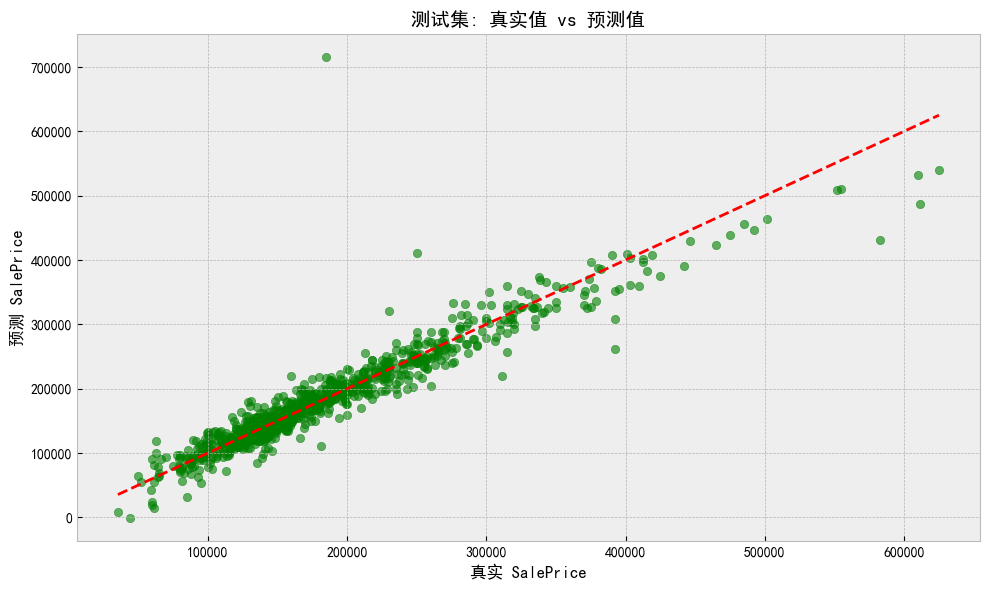

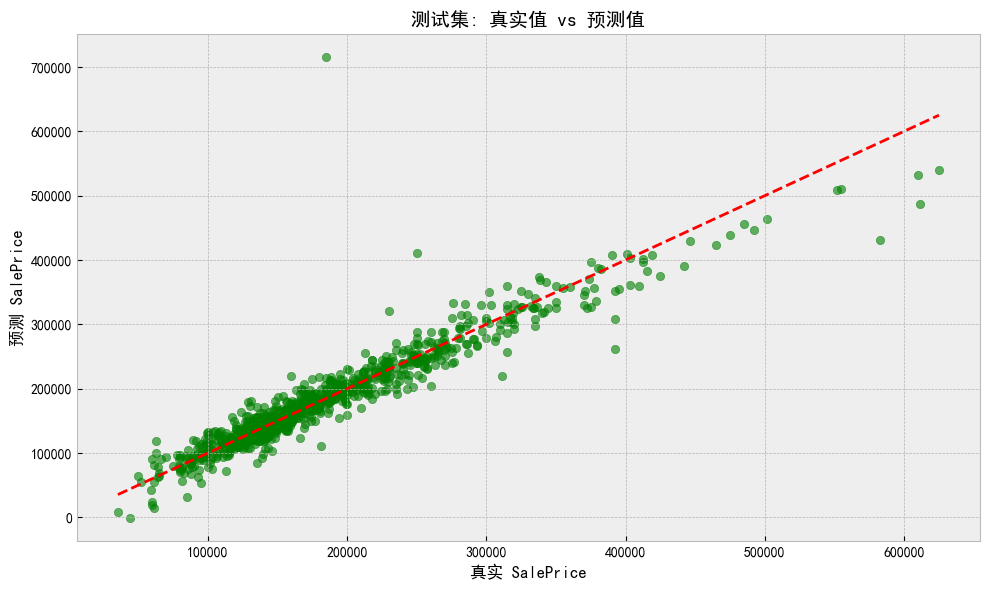

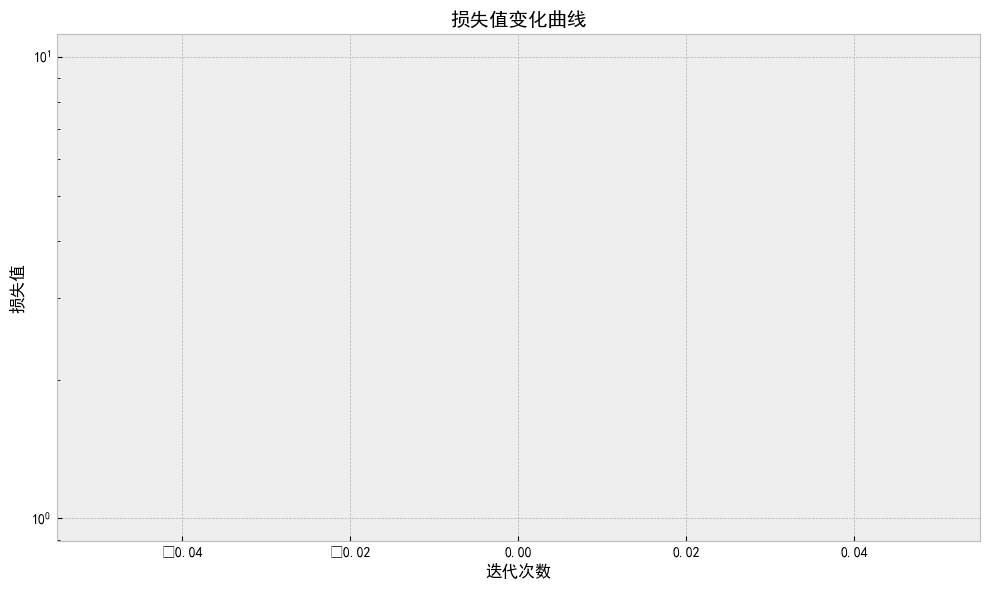

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 在初始化参数后添加以下代码
from sklearn.linear_model import Ridge

def main():
    
    data = pd.read_csv('D:/桌面/数据与代码/train1.csv')
    X = data.drop('SalePrice', axis=1).values
    y = data['SalePrice'].values.reshape(-1, 1)
    print(f"数据集样本数: {X.shape[0]}, 特征数: {X.shape[1]}")
    scaler = StandardScaler()
    y = scaler.fit_transform(y) 
    # 3. 初始化参数
    # 3.1 使用L2正则化（岭回归）获取更好的初始beta值
    ridge_model = Ridge(alpha=1)  # 使用相同的正则化系数lambda_0
    ridge_model.fit(X, y.ravel())  # 注意y需要展平为一维数组
    beta = ridge_model.coef_.reshape(-1, 1)  # 将系数转换为列向量作为beta初值
    beta = np.zeros((X.shape[1], 1)) # 使用全1向量作为beta初值
    lambda_0 =0.00000001        # 正则化系数（控制稀疏性）
    converge_limit_2 = 0.00001         # 内部收敛阈值
    max_iter_outer = 40      # 外部最大迭代次数
    sigma = 0.05                 # L0近似的平滑参数
    
    # 4. 创建优化器实例
    optimizer = interior_optimization(
        X, y, beta, lambda_0, converge_limit_2,  max_iter_outer, sigma
    )
    
    # 5. 记录损失值变化（用于可视化）
    losses = []
    initial_loss = optimizer.loss(beta)
    
    # 6. 执行牛顿法优化
    final_beta = optimizer.Newton()
    optimizer.plot_mse_curve()
    # 7. 打印结果
    print("\n=== 优化结果 ===")
    print(f"初始损失值: {initial_loss:.6f}")
    print(f"最终损失值: {optimizer.loss():.6f}")
    print(f"迭代次数: {optimizer.max_iter_outer}")

    print("\n模型系数（beta）:")
    for i, val in enumerate(final_beta.flatten()):
        print(f"  beta[{i}]: {val:.6f}")
    pd.DataFrame(final_beta.flatten()).to_csv('final_beta.csv', index=False, header=['beta'])

    # 添加的范数计算代码
    print(f"\nBeta的一范数 (L1): {np.linalg.norm(final_beta, ord=1):.6f}")
    print(f"Beta的二范数 (L2): {np.linalg.norm(final_beta, ord=2):.6f}")

    # 新添加：输出不在-sigma到sigma间的分量数
    sigma = optimizer.sigma  # 获取优化器中的sigma值
    out_range_count = np.sum(np.abs(final_beta) > sigma)  # 计算超出范围的分量数
    print(f"beta中不在[-{sigma}, {sigma}]间的分量数: {out_range_count}")
    
    # 8. 可视化真实值 vs 预测值
    y_pred = X @ final_beta
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.6)
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
    plt.title("真实值 vs 预测值", fontsize=14)
    plt.xlabel("真实 SalePrice", fontsize=12)
    plt.ylabel("预测 SalePrice", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 10. 加载测试集数据 [新增部分]
    test_data = pd.read_csv('D:/桌面/数据与代码/test1.csv')
    X_test = test_data.drop('SalePrice', axis=1).values
    y_test = test_data['SalePrice'].values.reshape(-1, 1)
    
    # 11. 测试集预测 [新增部分]
    # 使用训练集的scaler转换测试集目标变量
    y_test_scaled = scaler.transform(y_test) 
    y_test_pred_scaled = X_test @ final_beta
    y_test_original = scaler.inverse_transform(y_test_scaled)
    y_test_pred_original = scaler.inverse_transform(y_test_pred_scaled)
    # 12. 测试集评估
    print("\n=== 测试集评估 ===")
    test_data = pd.read_csv('D:/桌面/数据与代码/test1.csv')
    X_test = test_data.drop('SalePrice', axis=1).values
    y_test = test_data['SalePrice'].values.reshape(-1, 1)

    # 标准化测试集目标变量（使用训练集的scaler）
    y_test_scaled = scaler.transform(y_test)

    # 计算测试集预测值
    y_pred_test = X_test @ final_beta
    optimizer_test = interior_optimization(
        X_test, y_test_scaled, final_beta, lambda_0, 
        converge_limit_2, max_iter_outer, sigma
    )
    # 计算测试集损失（包含正则化项）
    test_loss = optimizer_test.loss(beta=final_beta)  # 使用训练得到的final_beta

    # 计算测试集MSE（标准化尺度）
    test_mse_scaled = optimizer_test.loss_MSE(beta=final_beta)

    # 转换为原始尺度计算MSE
    y_pred_test_original = scaler.inverse_transform(y_pred_test)
    y_test_original = scaler.inverse_transform(y_test_scaled)


    # 打印测试集评估结果
    print(f"测试集总损失（包含正则化项）: {test_loss:.6f}")
    print(f"测试集MSE（标准化尺度）: {test_mse_scaled:.6f}")
    # 可视化测试集真实值 vs 预测值（原始尺度）
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_original, y_pred_test_original, alpha=0.6, color='green')
    plt.plot([min(y_test_original), max(y_test_original)], 
            [min(y_test_original), max(y_test_original)], 'r--')
    plt.title("测试集: 真实值 vs 预测值", fontsize=14)
    plt.xlabel("真实 SalePrice", fontsize=12)
    plt.ylabel("预测 SalePrice", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # 13. 可视化测试集真实值 vs 预测值 [新增部分]
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_original, y_test_pred_original, alpha=0.6, color='green')
    plt.plot([min(y_test_original), max(y_test_original)], 
             [min(y_test_original), max(y_test_original)], 'r--')
    plt.title("测试集: 真实值 vs 预测值", fontsize=14)
    plt.xlabel("真实 SalePrice", fontsize=12)
    plt.ylabel("预测 SalePrice", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # 14. 绘制损失变化曲线 [新增部分]
    if hasattr(optimizer, 'loss_history'):
        plt.figure(figsize=(10, 6))
        plt.plot(optimizer.loss_history, 'b-o', linewidth=2)
        plt.title("损失值变化曲线", fontsize=14)
        plt.xlabel("迭代次数", fontsize=12)
        plt.ylabel("损失值", fontsize=12)
        plt.grid(True)
        plt.yscale('log')
        plt.tight_layout()
        plt.show()
if __name__ == "__main__":
    main()

拟牛顿法

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def bootstrap_regression(X, y, lambda_0, converge_limit_2, max_iter_outer, sigma, n_bootstraps=500):
    """
    执行Bootstrap重抽样回归分析
    """
    n_samples = X.shape[0]
    n_features = X.shape[1]
    
    # 存储所有Bootstrap迭代的beta值
    all_betas = np.zeros((n_bootstraps, n_features))
    
    for i in range(n_bootstraps):
        # 有放回抽样
        indices = resample(range(n_samples), replace=True, n_samples=n_samples)
        X_boot = X[indices]
        y_boot = y[indices]
        
        # 标准化bootstrap样本的y
        scaler_boot = StandardScaler()
        y_boot_scaled = scaler_boot.fit_transform(y_boot)
        
        # 使用岭回归初始化beta
        ridge_model = Ridge(alpha=1, fit_intercept=False)  # 设置fit_intercept=False
        ridge_model.fit(X_boot, y_boot_scaled.ravel())
        beta_init = ridge_model.coef_.reshape(-1, 1)
        
        # 创建优化器实例并优化
        optimizer = interior_optimization(
            X_boot, y_boot_scaled, beta_init, lambda_0, 
            converge_limit_2, max_iter_outer, sigma
        )
        beta_opt = optimizer.Newton()
        
        # 存储优化后的beta值
        all_betas[i] = beta_opt.flatten()
        
        # 每50次打印进度
        if (i + 1) % 50 == 0:
            print(f"已完成 {i+1}/{n_bootstraps} 次Bootstrap迭代")
    
    return all_betas

def calculate_confidence_intervals(all_betas, confidence_level=0.95):
    """
    计算每个特征的置信区间
    """
    alpha = 1 - confidence_level
    lower_percentile = (alpha / 2) * 100
    upper_percentile = 100 - lower_percentile
    
    # 计算每个特征的置信区间
    cis = []
    for i in range(all_betas.shape[1]):
        beta_values = all_betas[:, i]
        lower_bound = np.percentile(beta_values, lower_percentile)
        upper_bound = np.percentile(beta_values, upper_percentile)
        cis.append((lower_bound, upper_bound))
    
    return cis

def main():
    # ... [前面的代码保持不变，直到获取final_beta之后] ...
    
    # 在获取final_beta后添加以下代码：
    
    # 1. 执行Bootstrap重抽样
    data = pd.read_csv('D:/桌面/数据与代码/train1.csv')
    X = data.drop('SalePrice', axis=1).values
    y = data['SalePrice'].values.reshape(-1, 1)
    print(f"数据集样本数: {X.shape[0]}, 特征数: {X.shape[1]}")
    scaler = StandardScaler()
    y = scaler.fit_transform(y) 
    print("\n=== 开始Bootstrap重抽样 ===")
    n_bootstraps = 500
    lambda_0 =0.00000001        # 正则化系数（控制稀疏性）
    converge_limit_2 = 0.00001         # 内部收敛阈值
    max_iter_outer = 40      # 外部最大迭代次数
    sigma = 0.05                 # L0近似的平滑参数
    all_betas = bootstrap_regression(
        X, y, lambda_0, converge_limit_2, max_iter_outer, sigma, n_bootstraps
    )
    
    # 2. 计算95%置信区间
    confidence_intervals = calculate_confidence_intervals(all_betas)
    
    # 3. 打印每个特征的置信区间
    print("\n=== 特征系数的95%置信区间 ===")
    for i, (lower, upper) in enumerate(confidence_intervals):
        print(f"特征 {i}: [{lower:.6f}, {upper:.6f}]")
    
    # 4. 保存所有Bootstrap的beta值到CSV
    beta_df = pd.DataFrame(all_betas)
    beta_df.columns = [f'beta_{i}' for i in range(all_betas.shape[1])]
    beta_df.to_csv('bootstrap_betas.csv', index=False)
    print("\n已保存500次Bootstrap的beta值到 bootstrap_betas.csv")
    
    # ... [后续的测试集评估代码保持不变] ...

if __name__ == "__main__":
    main()

数据集样本数: 2051, 特征数: 261

=== 开始Bootstrap重抽样 ===
外部循环收敛，迭代次数: 21
外部循环收敛，迭代次数: 22
外部循环收敛，迭代次数: 19
外部循环收敛，迭代次数: 26
外部循环收敛，迭代次数: 21
外部循环收敛，迭代次数: 23
外部循环收敛，迭代次数: 38
外部循环收敛，迭代次数: 29
外部循环收敛，迭代次数: 26
外部循环收敛，迭代次数: 24
外部循环收敛，迭代次数: 32
外部循环收敛，迭代次数: 17
外部循环收敛，迭代次数: 30
外部循环收敛，迭代次数: 16
外部循环收敛，迭代次数: 22
外部循环收敛，迭代次数: 34
外部循环收敛，迭代次数: 34
外部循环收敛，迭代次数: 17
外部循环收敛，迭代次数: 21
外部循环收敛，迭代次数: 37
外部循环收敛，迭代次数: 34
外部循环收敛，迭代次数: 28
外部循环收敛，迭代次数: 19
外部循环收敛，迭代次数: 27
外部循环收敛，迭代次数: 35
外部循环收敛，迭代次数: 24
外部循环收敛，迭代次数: 19
外部循环收敛，迭代次数: 34
外部循环收敛，迭代次数: 17
外部循环收敛，迭代次数: 23
外部循环收敛，迭代次数: 33
外部循环收敛，迭代次数: 21
外部循环收敛，迭代次数: 22
外部循环收敛，迭代次数: 19
外部循环收敛，迭代次数: 22
外部循环收敛，迭代次数: 31
外部循环收敛，迭代次数: 29
外部循环收敛，迭代次数: 34
外部循环收敛，迭代次数: 39
外部循环收敛，迭代次数: 17
外部循环收敛，迭代次数: 36
外部循环收敛，迭代次数: 28
外部循环收敛，迭代次数: 33
外部循环收敛，迭代次数: 27
已完成 50/500 次Bootstrap迭代
外部循环收敛，迭代次数: 21
外部循环收敛，迭代次数: 30
外部循环收敛，迭代次数: 24
外部循环收敛，迭代次数: 31
外部循环收敛，迭代次数: 20
外部循环收敛，迭代次数: 27
外部循环收敛，迭代次数: 30
外部循环收敛，迭代次数: 34
外部循环收敛，迭代次数: 26
外部循环收敛，迭代次数: 34
外部循环收敛，迭代次数: 19
外部循环收敛，迭代次数: 30
外部循环收敛，迭代次数: 26
外部循环收敛，迭代次数: 22
外

拟牛顿法（DFP）函数

牛顿法较小lambda_0

训练数据集样本数: 2051, 特征数: 261
将测试的正则化参数: [1.00000000e-08 1.62377674e-08 2.63665090e-08 4.28133240e-08
 6.95192796e-08 1.12883789e-07 1.83298071e-07 2.97635144e-07
 4.83293024e-07 7.84759970e-07 1.27427499e-06 2.06913808e-06
 3.35981829e-06 5.45559478e-06 8.85866790e-06 1.43844989e-05
 2.33572147e-05 3.79269019e-05 6.15848211e-05 1.00000000e-04]

=== 当前正则化参数 lambda_0 = 1.00e-08 ===
训练损失: 0.067162, 测试损失: 1.026430
训练MSE: 0.067160, 测试MSE: 1.026428
非零系数数量: 216, L1范数: 2230.128274, L2范数: 528.770777

=== 当前正则化参数 lambda_0 = 1.62e-08 ===
训练损失: 0.067119, 测试损失: 1.022598
训练MSE: 0.067115, 测试MSE: 1.022594
非零系数数量: 216, L1范数: 2225.530144, L2范数: 527.651263

=== 当前正则化参数 lambda_0 = 2.64e-08 ===
训练损失: 0.067049, 测试损失: 1.004599
训练MSE: 0.067042, 测试MSE: 1.004592
非零系数数量: 215, L1范数: 2217.611295, L2范数: 525.844932

=== 当前正则化参数 lambda_0 = 4.28e-08 ===
训练损失: 0.066937, 测试损失: 0.987266
训练MSE: 0.066926, 测试MSE: 0.987255
非零系数数量: 213, L1范数: 2205.161120, L2范数: 522.937086

=== 当前正则化参数 lambda_0 = 6.95e-08 ===
训练损失: 0.066760, 测试损失:

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


训练损失: 0.085370, 测试损失: 58.207957
训练MSE: 0.059866, 测试MSE: 58.182453
非零系数数量: 231, L1范数: 9720.135136, L2范数: 1383.831187


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


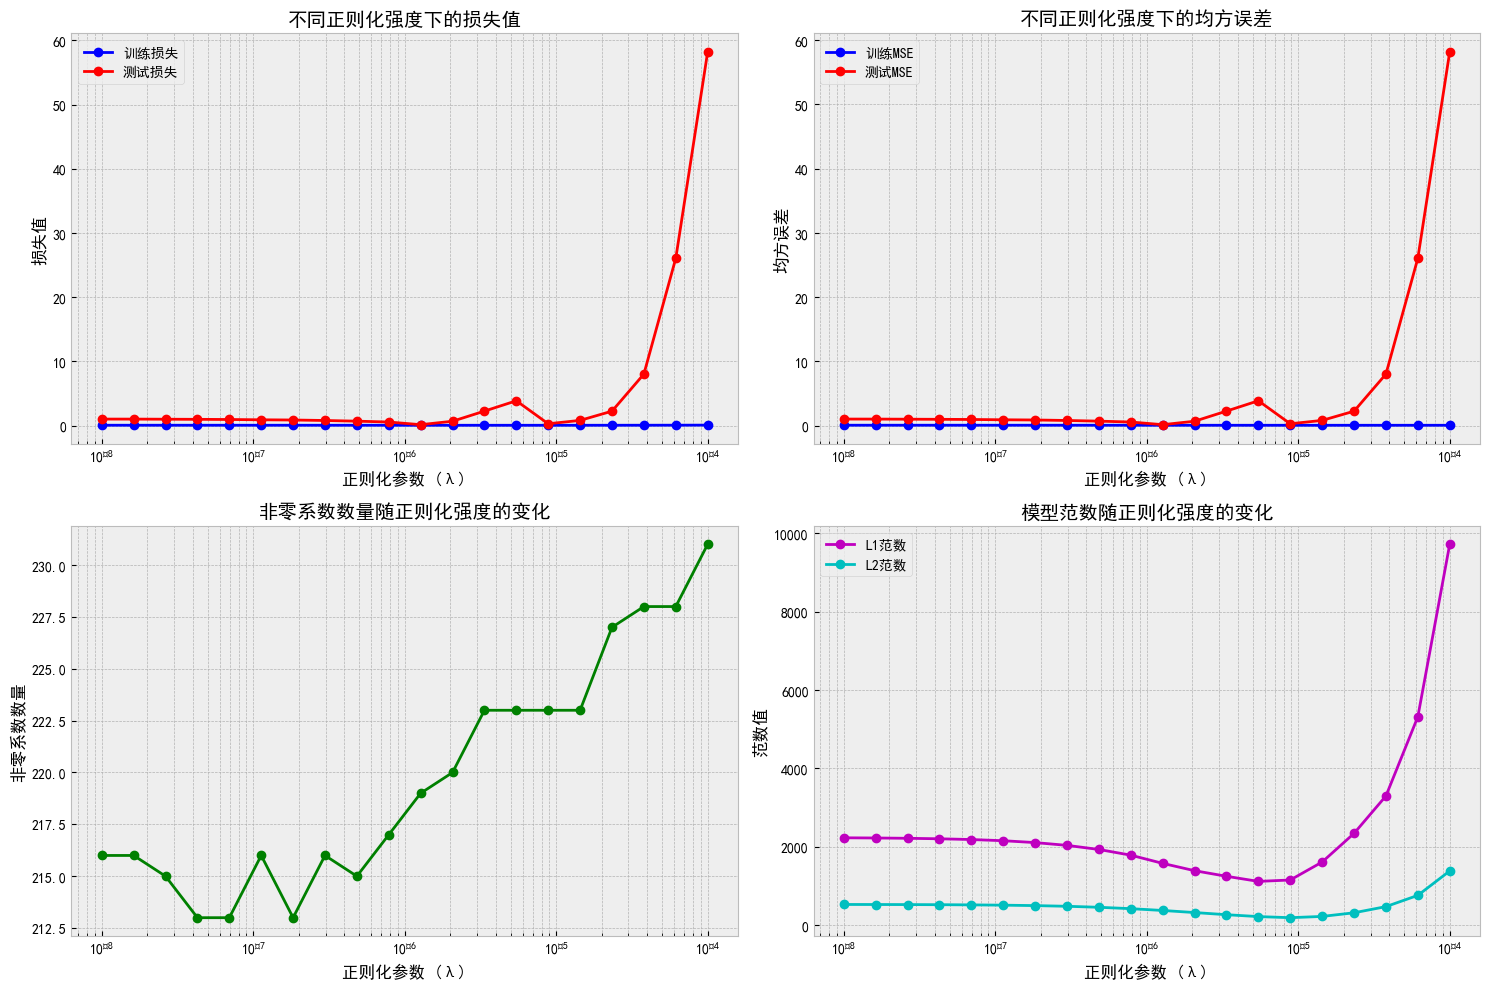


=== 最佳正则化参数 ===
λ = 1.27e-06
训练损失: 0.062416
测试损失: 0.153264
训练MSE: 0.062098
测试MSE: 0.152946
非零系数数量: 219

使用最佳正则化参数重新训练模型...


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def main():
    # 1. 加载训练数据
    data = pd.read_csv('D:/桌面/数据与代码/train1.csv')
    X_train = data.drop('SalePrice', axis=1).values
    y_train = data['SalePrice'].values.reshape(-1, 1)
    print(f"训练数据集样本数: {X_train.shape[0]}, 特征数: {X_train.shape[1]}")
    
    # 2. 标准化数据
    scaler = StandardScaler()
    y_train_scaled = scaler.fit_transform(y_train)
    
    # 3. 加载测试数据
    test_data = pd.read_csv('D:/桌面/数据与代码/test1.csv')
    X_test = test_data.drop('SalePrice', axis=1).values
    y_test = test_data['SalePrice'].values.reshape(-1, 1)
    y_test_scaled = scaler.transform(y_test)
    
    # 4. 定义不同lambda_0值（正则化强度）
    lambda_values = np.logspace(-8, -4, 20)  # 从10^-8到10^1的15个对数间隔值
    print(f"将测试的正则化参数: {lambda_values}")
    
    # 5. 存储结果的列表
    train_losses = []      # 训练损失
    test_losses = []        # 测试损失
    train_mses = []        # 训练MSE
    test_mses = []         # 测试MSE
    nonzero_counts = []    # 非零系数数量
    l1_norms = []          # L1范数
    l2_norms = []          # L2范数
    
    # 6. 固定其他参数
    converge_limit_2 = 0.00001
    max_iter_outer = 40
    sigma = 0.05
    
    # 7. 对不同lambda值进行循环优化
    for lambda_0 in lambda_values:
        print(f"\n=== 当前正则化参数 lambda_0 = {lambda_0:.2e} ===")
        
        # 7.1 使用岭回归获取更好的初始beta值
        ridge_model = Ridge(alpha=lambda_0)
        ridge_model.fit(X_train, y_train_scaled.ravel())
        beta = ridge_model.coef_.reshape(-1, 1)
        
        # 7.2 创建优化器实例
        optimizer = interior_optimization(
            X_train, y_train_scaled, beta, lambda_0, 
            converge_limit_2, max_iter_outer, sigma
        )
        
        # 7.3 执行牛顿法优化
        final_beta = optimizer.Newton()
        
        # 7.4 记录训练损失
        train_loss = optimizer.loss(beta=final_beta)
        train_losses.append(train_loss)
        
        # 7.5 计算训练MSE
        train_mse = optimizer.loss_MSE(beta=final_beta)
        train_mses.append(train_mse)
        
        # 7.6 计算测试损失和MSE
        optimizer_test = interior_optimization(
            X_test, y_test_scaled, final_beta, lambda_0, 
            converge_limit_2, max_iter_outer, sigma
        )
        test_loss = optimizer_test.loss(beta=final_beta)
        test_losses.append(test_loss)
        
        test_mse = optimizer_test.loss_MSE(beta=final_beta)
        test_mses.append(test_mse)
        
        # 7.7 计算模型复杂度指标
        nonzero_count = np.sum(np.abs(final_beta) > sigma)
        nonzero_counts.append(nonzero_count)
        
        l1_norm = np.linalg.norm(final_beta, ord=1)
        l1_norms.append(l1_norm)
        
        l2_norm = np.linalg.norm(final_beta, ord=2)
        l2_norms.append(l2_norm)
        
        print(f"训练损失: {train_loss:.6f}, 测试损失: {test_loss:.6f}")
        print(f"训练MSE: {train_mse:.6f}, 测试MSE: {test_mse:.6f}")
        print(f"非零系数数量: {nonzero_count}, L1范数: {l1_norm:.6f}, L2范数: {l2_norm:.6f}")
    
    # 8. 绘制结果图表
    plt.figure(figsize=(15, 10))
    
    # 8.1 训练和测试损失对比
    plt.subplot(2, 2, 1)
    plt.semilogx(lambda_values, train_losses, 'bo-', label='训练损失')
    plt.semilogx(lambda_values, test_losses, 'ro-', label='测试损失')
    plt.title('不同正则化强度下的损失值', fontsize=14)
    plt.xlabel('正则化参数 (λ)', fontsize=12)
    plt.ylabel('损失值', fontsize=12)
    plt.grid(True, which="both", ls="--")
    plt.legend()
    
    # 8.2 训练和测试MSE对比
    plt.subplot(2, 2, 2)
    plt.semilogx(lambda_values, train_mses, 'bo-', label='训练MSE')
    plt.semilogx(lambda_values, test_mses, 'ro-', label='测试MSE')
    plt.title('不同正则化强度下的均方误差', fontsize=14)
    plt.xlabel('正则化参数 (λ)', fontsize=12)
    plt.ylabel('均方误差', fontsize=12)
    plt.grid(True, which="both", ls="--")
    plt.legend()
    
    # 8.3 非零系数数量
    plt.subplot(2, 2, 3)
    plt.semilogx(lambda_values, nonzero_counts, 'go-')
    plt.title('非零系数数量随正则化强度的变化', fontsize=14)
    plt.xlabel('正则化参数 (λ)', fontsize=12)
    plt.ylabel('非零系数数量', fontsize=12)
    plt.grid(True, which="both", ls="--")
    
    # 8.4 模型范数
    plt.subplot(2, 2, 4)
    plt.semilogx(lambda_values, l1_norms, 'mo-', label='L1范数')
    plt.semilogx(lambda_values, l2_norms, 'co-', label='L2范数')
    plt.title('模型范数随正则化强度的变化', fontsize=14)
    plt.xlabel('正则化参数 (λ)', fontsize=12)
    plt.ylabel('范数值', fontsize=12)
    plt.grid(True, which="both", ls="--")
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('lambda_comparison.png')
    plt.show()
    
    # 9. 找出最佳lambda值（最小测试损失对应的λ）
    best_idx = np.argmin(test_losses)
    best_lambda = lambda_values[best_idx]
    print(f"\n=== 最佳正则化参数 ===")
    print(f"λ = {best_lambda:.2e}")
    print(f"训练损失: {train_losses[best_idx]:.6f}")
    print(f"测试损失: {test_losses[best_idx]:.6f}")
    print(f"训练MSE: {train_mses[best_idx]:.6f}")
    print(f"测试MSE: {test_mses[best_idx]:.6f}")
    print(f"非零系数数量: {nonzero_counts[best_idx]}")
    
    # 10. 使用最佳lambda重新训练模型（可选）
    print("\n使用最佳正则化参数重新训练模型...")
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_train, y_train_scaled.ravel())
    beta = ridge_model.coef_.reshape(-1, 1)
    
    optimizer = interior_optimization(
        X_train, y_train_scaled, beta, best_lambda, 
        converge_limit_2, max_iter_outer, sigma
    )
    
    final_beta = optimizer.Newton()
    
    # 保存最佳模型系数
    pd.DataFrame(final_beta.flatten()).to_csv('best_beta.csv', index=False, header=['beta'])
    
    # 后续分析（如特征重要性）...

if __name__ == "__main__":
    main()

牛顿法较大lambda_0

训练数据集样本数: 2051, 特征数: 261
将测试的正则化参数: [1.00000000e-02 2.06913808e-02 4.28133240e-02 8.85866790e-02
 1.83298071e-01 3.79269019e-01 7.84759970e-01 1.62377674e+00
 3.35981829e+00 6.95192796e+00 1.43844989e+01 2.97635144e+01
 6.15848211e+01 1.27427499e+02 2.63665090e+02 5.45559478e+02
 1.12883789e+03 2.33572147e+03 4.83293024e+03 1.00000000e+04]

=== 当前正则化参数 lambda_0 = 1.00e-02 ===
训练损失: 7.327467, 测试损失: 7.422790
训练MSE: 5.108263, 测试MSE: 5.203587
非零系数数量: 163, L1范数: 70.592506, L2范数: 16.530130

=== 当前正则化参数 lambda_0 = 2.07e-02 ===
训练损失: 7.437544, 测试损失: 7.521980
训练MSE: 2.753489, 测试MSE: 2.837925
非零系数数量: 157, L1范数: 62.516322, L2范数: 14.963250

=== 当前正则化参数 lambda_0 = 4.28e-02 ===
训练损失: 10.762307, 测试损失: 10.836642
训练MSE: 1.302739, 测试MSE: 1.377075
非零系数数量: 144, L1范数: 53.611689, L2范数: 12.732205

=== 当前正则化参数 lambda_0 = 8.86e-02 ===
训练损失: 20.000404, 测试损失: 20.065019
训练MSE: 0.426691, 测试MSE: 0.491305
非零系数数量: 140, L1范数: 44.763863, L2范数: 9.949911

=== 当前正则化参数 lambda_0 = 1.83e-01 ===
训练损失: 39.794425, 测试损失: 39.8516

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


训练损失: 900935.468455, 测试损失: 900935.493481
训练MSE: 0.215069, 测试MSE: 0.240094
非零系数数量: 0, L1范数: 1.785086, L2范数: 0.168804


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


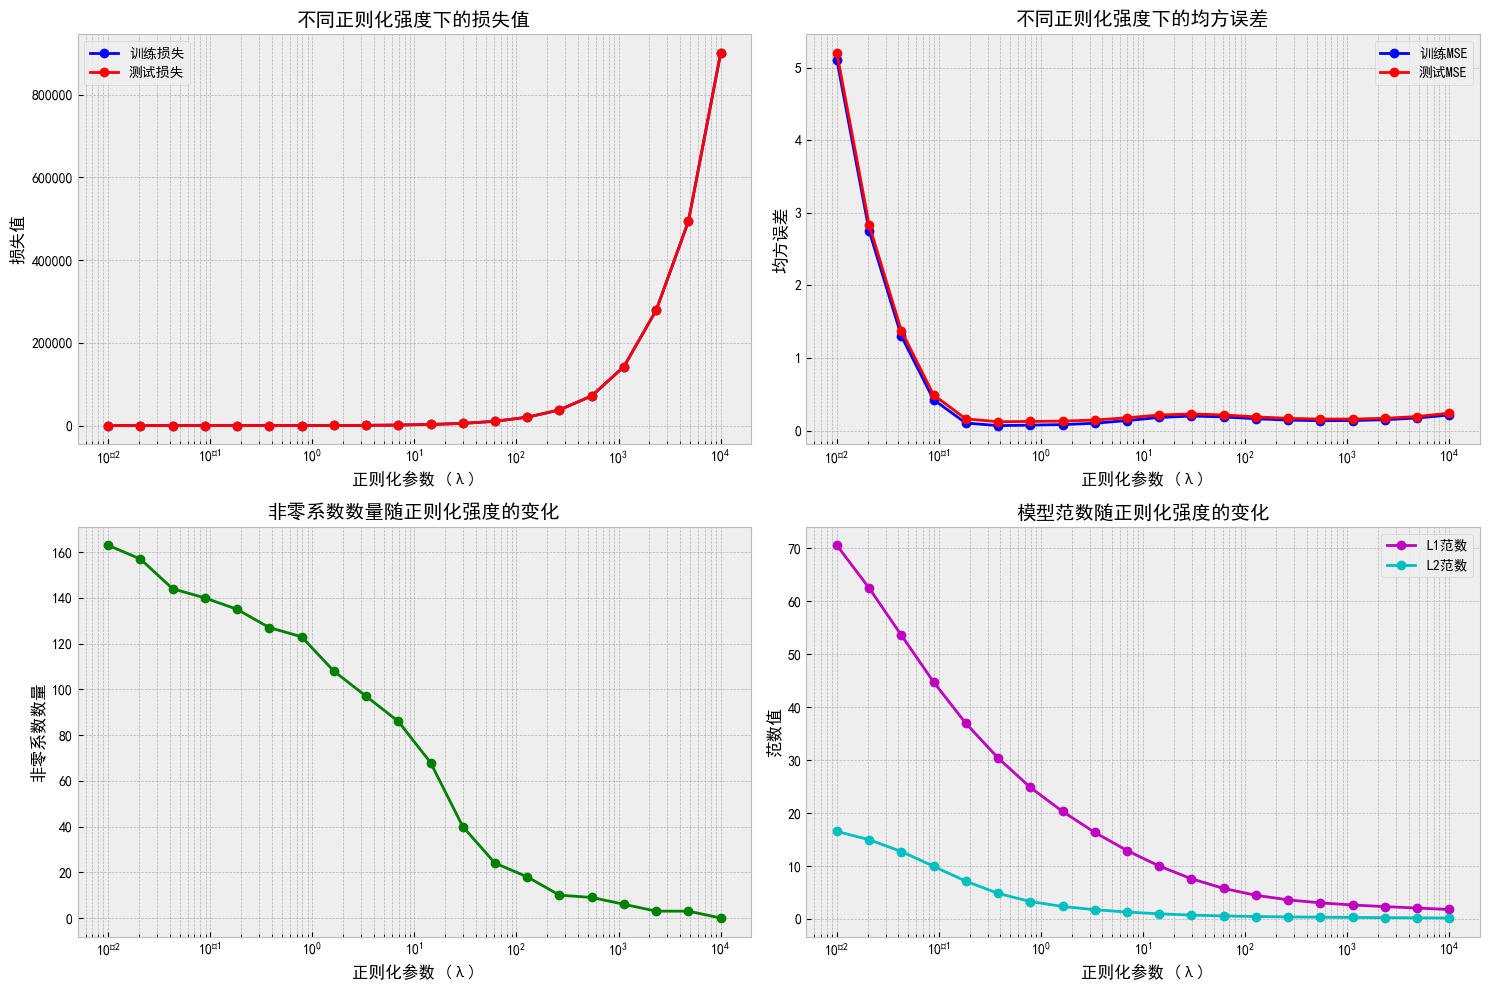


=== 最佳正则化参数 ===
λ = 1.00e-02
训练损失: 7.327467
测试损失: 7.422790
训练MSE: 5.108263
测试MSE: 5.203587
非零系数数量: 163

使用最佳正则化参数重新训练模型...


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def main():
    # 1. 加载训练数据
    data = pd.read_csv('D:/桌面/数据与代码/train1.csv')
    X_train = data.drop('SalePrice', axis=1).values
    y_train = data['SalePrice'].values.reshape(-1, 1)
    print(f"训练数据集样本数: {X_train.shape[0]}, 特征数: {X_train.shape[1]}")
    
    # 2. 标准化数据
    scaler = StandardScaler()
    y_train_scaled = scaler.fit_transform(y_train)
    
    # 3. 加载测试数据
    test_data = pd.read_csv('D:/桌面/数据与代码/test1.csv')
    X_test = test_data.drop('SalePrice', axis=1).values
    y_test = test_data['SalePrice'].values.reshape(-1, 1)
    y_test_scaled = scaler.transform(y_test)
    
    # 4. 定义不同lambda_0值（正则化强度）
    lambda_values = np.logspace(-2, 4, 20)  # 从10^-8到10^1的15个对数间隔值
    print(f"将测试的正则化参数: {lambda_values}")
    
    # 5. 存储结果的列表
    train_losses = []      # 训练损失
    test_losses = []        # 测试损失
    train_mses = []        # 训练MSE
    test_mses = []         # 测试MSE
    nonzero_counts = []    # 非零系数数量
    l1_norms = []          # L1范数
    l2_norms = []          # L2范数
    
    # 6. 固定其他参数
    converge_limit_2 = 0.00001
    max_iter_outer = 40
    sigma = 0.05
    
    # 7. 对不同lambda值进行循环优化
    for lambda_0 in lambda_values:
        print(f"\n=== 当前正则化参数 lambda_0 = {lambda_0:.2e} ===")
        
        # 7.1 使用岭回归获取更好的初始beta值
        ridge_model = Ridge(alpha=lambda_0)
        ridge_model.fit(X_train, y_train_scaled.ravel())
        beta = ridge_model.coef_.reshape(-1, 1)
        
        # 7.2 创建优化器实例
        optimizer = interior_optimization(
            X_train, y_train_scaled, beta, lambda_0, 
            converge_limit_2, max_iter_outer, sigma
        )
        
        # 7.3 执行牛顿法优化
        final_beta = optimizer.Newton()
        
        # 7.4 记录训练损失
        train_loss = optimizer.loss(beta=final_beta)
        train_losses.append(train_loss)
        
        # 7.5 计算训练MSE
        train_mse = optimizer.loss_MSE(beta=final_beta)
        train_mses.append(train_mse)
        
        # 7.6 计算测试损失和MSE
        optimizer_test = interior_optimization(
            X_test, y_test_scaled, final_beta, lambda_0, 
            converge_limit_2, max_iter_outer, sigma
        )
        test_loss = optimizer_test.loss(beta=final_beta)
        test_losses.append(test_loss)
        
        test_mse = optimizer_test.loss_MSE(beta=final_beta)
        test_mses.append(test_mse)
        
        # 7.7 计算模型复杂度指标
        nonzero_count = np.sum(np.abs(final_beta) > sigma)
        nonzero_counts.append(nonzero_count)
        
        l1_norm = np.linalg.norm(final_beta, ord=1)
        l1_norms.append(l1_norm)
        
        l2_norm = np.linalg.norm(final_beta, ord=2)
        l2_norms.append(l2_norm)
        
        print(f"训练损失: {train_loss:.6f}, 测试损失: {test_loss:.6f}")
        print(f"训练MSE: {train_mse:.6f}, 测试MSE: {test_mse:.6f}")
        print(f"非零系数数量: {nonzero_count}, L1范数: {l1_norm:.6f}, L2范数: {l2_norm:.6f}")
    
    # 8. 绘制结果图表
    plt.figure(figsize=(15, 10))
    
    # 8.1 训练和测试损失对比
    plt.subplot(2, 2, 1)
    plt.semilogx(lambda_values, train_losses, 'bo-', label='训练损失')
    plt.semilogx(lambda_values, test_losses, 'ro-', label='测试损失')
    plt.title('不同正则化强度下的损失值', fontsize=14)
    plt.xlabel('正则化参数 (λ)', fontsize=12)
    plt.ylabel('损失值', fontsize=12)
    plt.grid(True, which="both", ls="--")
    plt.legend()
    
    # 8.2 训练和测试MSE对比
    plt.subplot(2, 2, 2)
    plt.semilogx(lambda_values, train_mses, 'bo-', label='训练MSE')
    plt.semilogx(lambda_values, test_mses, 'ro-', label='测试MSE')
    plt.title('不同正则化强度下的均方误差', fontsize=14)
    plt.xlabel('正则化参数 (λ)', fontsize=12)
    plt.ylabel('均方误差', fontsize=12)
    plt.grid(True, which="both", ls="--")
    plt.legend()
    
    # 8.3 非零系数数量
    plt.subplot(2, 2, 3)
    plt.semilogx(lambda_values, nonzero_counts, 'go-')
    plt.title('非零系数数量随正则化强度的变化', fontsize=14)
    plt.xlabel('正则化参数 (λ)', fontsize=12)
    plt.ylabel('非零系数数量', fontsize=12)
    plt.grid(True, which="both", ls="--")
    
    # 8.4 模型范数
    plt.subplot(2, 2, 4)
    plt.semilogx(lambda_values, l1_norms, 'mo-', label='L1范数')
    plt.semilogx(lambda_values, l2_norms, 'co-', label='L2范数')
    plt.title('模型范数随正则化强度的变化', fontsize=14)
    plt.xlabel('正则化参数 (λ)', fontsize=12)
    plt.ylabel('范数值', fontsize=12)
    plt.grid(True, which="both", ls="--")
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('lambda_comparison.png')
    plt.show()
    
    # 9. 找出最佳lambda值（最小测试损失对应的λ）
    best_idx = np.argmin(test_losses)
    best_lambda = lambda_values[best_idx]
    print(f"\n=== 最佳正则化参数 ===")
    print(f"λ = {best_lambda:.2e}")
    print(f"训练损失: {train_losses[best_idx]:.6f}")
    print(f"测试损失: {test_losses[best_idx]:.6f}")
    print(f"训练MSE: {train_mses[best_idx]:.6f}")
    print(f"测试MSE: {test_mses[best_idx]:.6f}")
    print(f"非零系数数量: {nonzero_counts[best_idx]}")
    
    # 10. 使用最佳lambda重新训练模型（可选）
    print("\n使用最佳正则化参数重新训练模型...")
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_train, y_train_scaled.ravel())
    beta = ridge_model.coef_.reshape(-1, 1)
    
    optimizer = interior_optimization(
        X_train, y_train_scaled, beta, best_lambda, 
        converge_limit_2, max_iter_outer, sigma
    )
    
    final_beta = optimizer.Newton()
    
    # 保存最佳模型系数
    pd.DataFrame(final_beta.flatten()).to_csv('best_beta.csv', index=False, header=['beta'])
    
    # 后续分析（如特征重要性）...

if __name__ == "__main__":
    main()

伪牛顿法


数据集样本数: 2051, 特征数: 261
达到最大迭代次数 40

=== 优化结果 ===
初始损失值: 0.077061
最终损失值: 0.072393

模型系数（beta）:
  beta[0]: 0.038800
  beta[1]: -0.010609
  beta[2]: -0.063349
  beta[3]: 0.044446
  beta[4]: 0.304318
  beta[5]: 0.042012
  beta[6]: 0.173393
  beta[7]: -0.056688
  beta[8]: 0.047299
  beta[9]: -0.034242
  beta[10]: 0.079220
  beta[11]: 0.091498
  beta[12]: -0.030085
  beta[13]: 0.057493
  beta[14]: 0.298601
  beta[15]: -0.009658
  beta[16]: 0.291789
  beta[17]: 0.087479
  beta[18]: -0.001502
  beta[19]: 0.166619
  beta[20]: -0.177417
  beta[21]: -0.078317
  beta[22]: -0.019738
  beta[23]: -0.018713
  beta[24]: -0.045783
  beta[25]: -0.095663
  beta[26]: 0.178772
  beta[27]: 0.021173
  beta[28]: 0.040261
  beta[29]: -0.012013
  beta[30]: 0.015424
  beta[31]: 0.013345
  beta[32]: 0.094538
  beta[33]: 0.071752
  beta[34]: 0.064920
  beta[35]: -0.056339
  beta[36]: 0.106927
  beta[37]: 0.035599
  beta[38]: 0.008109
  beta[39]: -0.004446
  beta[40]: 0.026785
  beta[41]: 0.084899
  beta[42]: -0.039

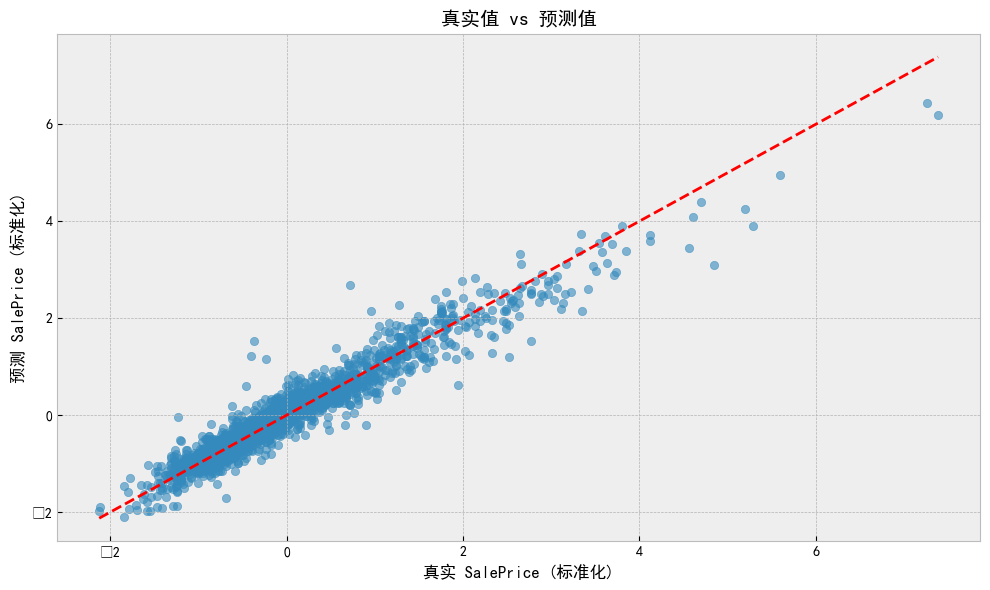

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

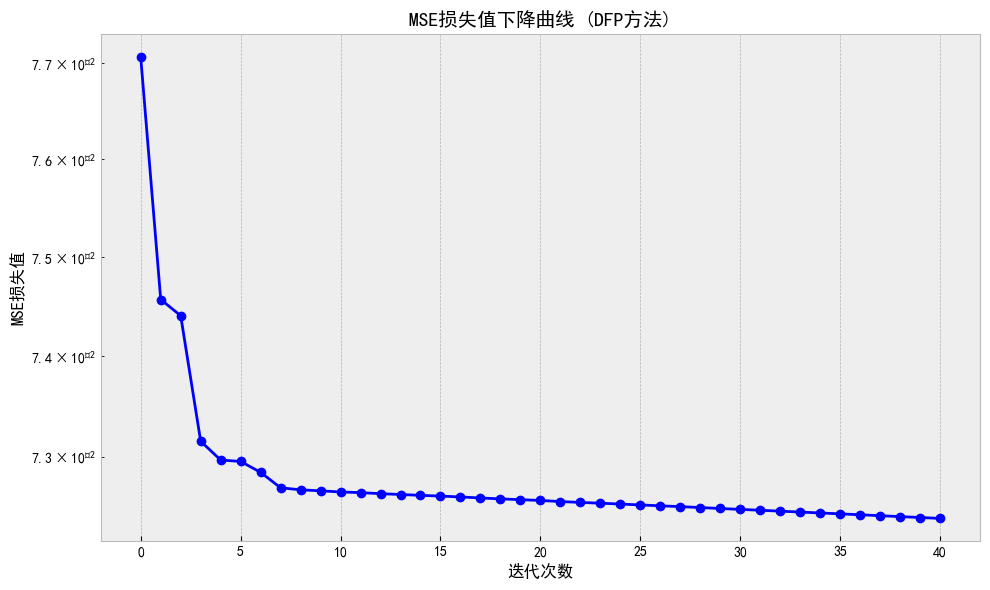


=== 测试集评估 ===
测试集总损失（包含正则化项）: 0.127936
测试集MSE（标准化尺度）: 0.127934
测试集MSE（原始尺度）: 778578751.782361


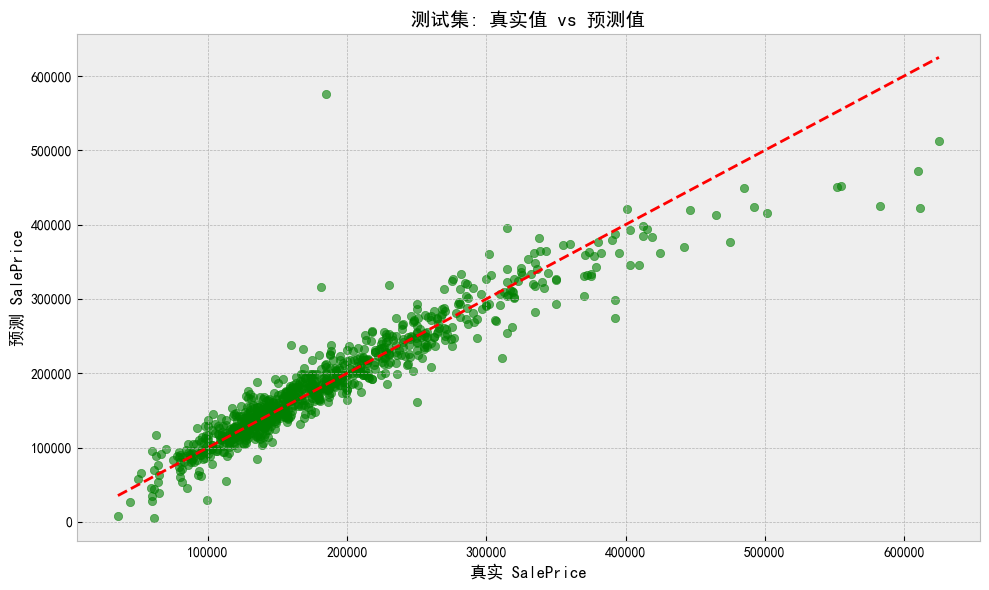

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

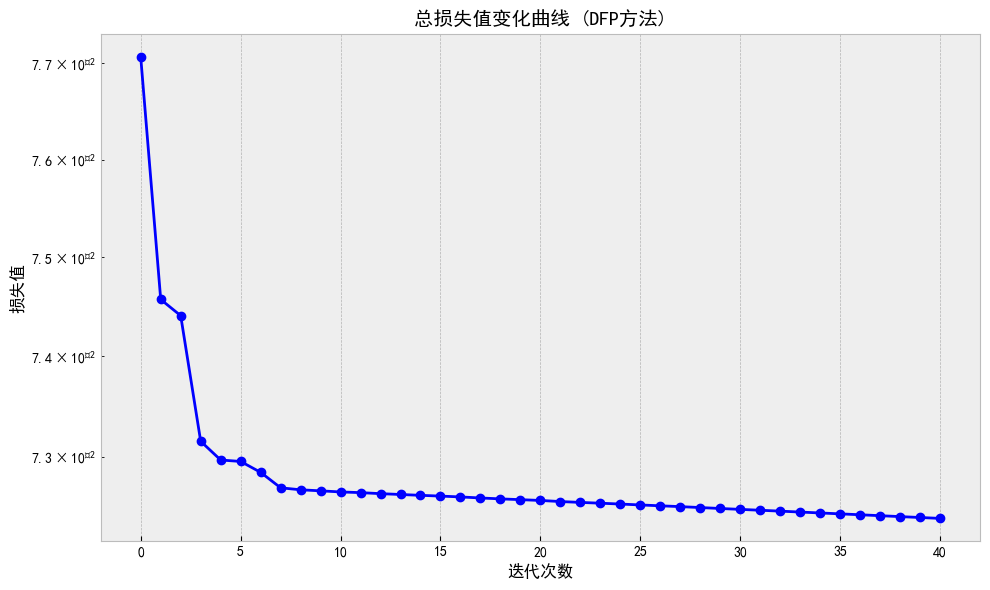

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

class interior_optimization:
    def __init__(self, X, y, beta, lambda_0, converge_limit, max_iter_outer, sigma):
        self.X = X
        self.y = y
        self.beta = beta.copy()
        self.lambda_0 = lambda_0
        self.converge_limit_2 = converge_limit
        self.max_iter_outer = max_iter_outer
        self.sigma = sigma
        self.loss_history = []  # 记录总损失历史
        self.mse_history = []   # 记录MSE历史
    
    def loss_MSE(self, beta=None):
        """
        Compute the Mean Squared Error (MSE) loss.
        If `beta` is provided, use it; otherwise use self.beta.
        """
        X = self.X
        y = self.y
        n = len(y)
        
        # 动态选择 beta 来源
        if beta is None:
            beta = self.beta  # 默认使用类属性
        else:
            beta = beta       # 使用传入的参数
        
        # 计算 MSE
        return (1 / n) * np.sum((y - X @ beta) ** 2)
    def loss_kernal(self,beta=None):
        """
        Compute the L0 loss.
        """
        # 动态选择 beta 来源
        if beta is None:
            beta = self.beta  # 默认使用类属性
        else:
            beta = beta       # 使用传入的参数
        X = self.X
        y = self.y
        p = 0
        sigma = self.sigma
        k = [0] * len(self.beta)  # Initialize k as a list of zeros
        for i in range(len(beta)):  # 修改为从0开始
            if 0 < beta[i] < sigma:   # 注意：beta[i] 是一个标量（形状为(1,)的数组？或者标量？）
                # 如果beta[i]是数组（形状为(1,)），则需要索引[0]，或者使用item()
                if isinstance(beta[i], np.ndarray) and beta[i].size == 1:
                    beta_val = beta[i].item()
                else:
                    beta_val = beta[i]
                # 现在用beta_val判断
                if 0 < beta_val < sigma:
                    k[i] = (sigma - beta_val) / sigma
                elif -sigma < beta_val < 0:
                    k[i] = (sigma + beta_val) / sigma
                else:
                    k[i] = 0
            else:
                k[i] = 0
            p += k[i]
        # 打印p的类型
        #print(f"p的类型: {type(p)}")
        #print(f"当前的惩罚项值为：{p}")
        return len(self.beta)-p
    def loss(self,beta=None):
        """
        Compute the total loss, which is the sum of MSE and the penalty term.
        """
        # 动态选择 beta 来源
        if beta is None:
            beta = self.beta  # 默认使用类属性
        else:
            beta = beta
        X = self.X
        y = self.y
        mse_loss = self.loss_MSE(beta)  # 使用传入的 beta 或类属性 beta
        penalty_loss = self.loss_kernal(beta)
        return mse_loss + self.lambda_0 * penalty_loss
    def grad_MSE(self, beta=None):
        """计算MSE部分的梯度"""
        if beta is None:
            beta = self.beta
        n = len(self.y)
        return -2/ n * self.X.T @ (self.y - self.X @ beta)
    
    def grad_penalty(self, beta=None):
        if beta is None:
            beta = self.beta  # 默认使用类属性
        else:
            beta = beta
        grad_vec = np.zeros_like(beta)
        for i in range(len(beta)):
            if 0 < beta[i] < self.sigma:
                grad_vec[i] = 1/self.sigma
            elif -self.sigma < beta[i] < 0:
                grad_vec[i] = -1/self.sigma
        return -self.lambda_0 * grad_vec  # 返回向量
    def grad(self, beta=None):
        """计算总梯度（MSE梯度 + 正则化梯度）"""
        if beta is None:
            beta = self.beta
        return self.grad_MSE(beta) + self.grad_penalty(beta)
    
    def DFP(self):
        """
        使用DFP拟牛顿法优化参数beta
        参考[1][2][6][7]中的DFP算法实现
        """
        beta = self.beta.copy()
        n = beta.shape[0]
        H = np.eye(n)  # 初始近似海森逆矩阵为单位矩阵[1][2]
        g = self.grad(beta)  # 初始梯度
        
        # 记录初始损失
        self.loss_history.append(self.loss(beta))
        self.mse_history.append(self.loss_MSE(beta))
        
        for i in range(self.max_iter_outer):
            # 计算搜索方向
            d = -H @ g
            
            # 回溯线搜索确定步长（Armijo条件）[6][7]
            alpha = self.backtracking_line_search(beta, d)
            
            # 更新参数
            beta_new = beta + alpha * d
            
            # 计算新梯度
            g_new = self.grad(beta_new)
            
            # 计算梯度变化和参数变化
            s = beta_new - beta
            y_grad = g_new - g
            
            # 更新近似海森逆矩阵 (DFP公式)[1][2]
            ys = y_grad.T @ s
            if ys > 1e-10:  # 确保分母不为零
                Hy = H @ y_grad
                # DFP校正公式
                H = H + (s @ s.T) / ys - (Hy @ Hy.T) / (y_grad.T @ Hy)
            
            # 更新参数和梯度
            beta = beta_new
            g = g_new
            
            # 记录损失
            current_loss = self.loss(beta)
            current_mse = self.loss_MSE(beta)
            self.loss_history.append(current_loss)
            self.mse_history.append(current_mse)
            
            # 检查收敛条件 (梯度范数)[7]
            g_norm = np.linalg.norm(g)
            if g_norm < self.converge_limit_2:
                print(f"DFP收敛于 {i+1} 次迭代，梯度范数: {g_norm:.6f}")
                self.beta = beta
                return beta
        
        print(f"达到最大迭代次数 {self.max_iter_outer}")
        self.beta = beta
        return beta
    
    def backtracking_line_search(self, beta, d, alpha_init=1.0, rho=0.5, c=1e-4):
        """
        回溯线搜索 (Armijo条件)[6][7]
        """
        alpha = alpha_init
        f_current = self.loss(beta)
        g = self.grad(beta)
        g_d = g.T @ d  # 梯度与搜索方向的内积
        
        for _ in range(20):  # 最大20次回溯尝试
            beta_new = beta + alpha * d
            f_new = self.loss(beta_new)
            
            # Armijo条件：f_new <= f_current + c * alpha * g_d
            if f_new <= f_current + c * alpha * g_d:
                return alpha
            alpha *= rho  # 减小步长
        
        return alpha  # 返回最后尝试的步长
    
    def plot_mse_curve(self):
        """绘制MSE损失下降曲线"""
        if not self.mse_history:
            print("无MSE历史记录")
            return
        
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.mse_history)), self.mse_history, 'b-o', linewidth=2)
        plt.title("MSE损失值下降曲线 (DFP方法)", fontsize=14)
        plt.xlabel("迭代次数", fontsize=12)
        plt.ylabel("MSE损失值", fontsize=12)
        plt.grid(True)
        plt.yscale('log')  # 使用对数刻度更清晰展示变化
        plt.tight_layout()
        plt.show()

def main():
    # 1. 加载数据
    data = pd.read_csv('D:/桌面/数据与代码/train1.csv')
    X = data.drop('SalePrice', axis=1).values
    y = data['SalePrice'].values.reshape(-1, 1)
    print(f"数据集样本数: {X.shape[0]}, 特征数: {X.shape[1]}")
    
    # 2. 标准化数据
    scaler = StandardScaler()
    y_scaled = scaler.fit_transform(y) 
    
    # 3. 初始化参数
    # 使用岭回归获取初始beta值
    ridge_model = Ridge(alpha=1)
    ridge_model.fit(X, y_scaled.ravel())
    beta = ridge_model.coef_.reshape(-1, 1)
    
    lambda_0 = 0.00000001  # 正则化系数
    converge_limit_2 = 0.00001  # 收敛阈值
    max_iter_outer = 40  # 最大迭代次数
    sigma = 0.05  # L0近似的平滑参数
    
    # 4. 创建优化器实例
    optimizer = interior_optimization(
        X, y_scaled, beta, lambda_0, converge_limit_2, max_iter_outer, sigma
    )
    
    # 5. 记录初始损失
    initial_loss = optimizer.loss(beta)
    
    # 6. 执行DFP优化（替换了原来的牛顿法）
    final_beta = optimizer.DFP()
    
    # 7. 打印结果
    print("\n=== 优化结果 ===")
    print(f"初始损失值: {initial_loss:.6f}")
    print(f"最终损失值: {optimizer.loss():.6f}")
    
    print("\n模型系数（beta）:")
    for i, val in enumerate(final_beta.flatten()):
        print(f"  beta[{i}]: {val:.6f}")
    pd.DataFrame(final_beta.flatten()).to_csv('final_beta.csv', index=False, header=['beta'])

    # 添加的范数计算代码
    print(f"\nBeta的一范数 (L1): {np.linalg.norm(final_beta, ord=1):.6f}")
    print(f"Beta的二范数 (L2): {np.linalg.norm(final_beta, ord=2):.6f}")

    # 输出不在-sigma到sigma间的分量数
    out_range_count = np.sum(np.abs(final_beta) > sigma)
    print(f"beta中不在[-{sigma}, {sigma}]间的分量数: {out_range_count}")
    
    # 8. 可视化真实值 vs 预测值
    y_pred = X @ final_beta
    plt.figure(figsize=(10, 6))
    plt.scatter(y_scaled, y_pred, alpha=0.6)
    plt.plot([min(y_scaled), max(y_scaled)], [min(y_scaled), max(y_scaled)], 'r--')
    plt.title("真实值 vs 预测值", fontsize=14)
    plt.xlabel("真实 SalePrice (标准化)", fontsize=12)
    plt.ylabel("预测 SalePrice (标准化)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # 9. 绘制MSE下降曲线
    optimizer.plot_mse_curve()
    
    # 10. 加载测试集数据
    test_data = pd.read_csv('D:/桌面/数据与代码/test1.csv')
    X_test = test_data.drop('SalePrice', axis=1).values
    y_test = test_data['SalePrice'].values.reshape(-1, 1)
    
    # 11. 测试集预测
    y_test_scaled = scaler.transform(y_test)
    y_pred_test = X_test @ final_beta
    
    # 12. 测试集评估
    print("\n=== 测试集评估 ===")
    # 计算测试集损失（包含正则化项）
    optimizer_test = interior_optimization(
        X_test, y_test_scaled, final_beta, lambda_0, 
        converge_limit_2, max_iter_outer, sigma
    )
    test_loss = optimizer_test.loss(beta=final_beta)
    test_mse_scaled = optimizer_test.loss_MSE(beta=final_beta)
    
    # 转换为原始尺度
    y_test_original = scaler.inverse_transform(y_test_scaled)
    y_pred_test_original = scaler.inverse_transform(y_pred_test)
    
    # 打印测试集评估结果
    print(f"测试集总损失（包含正则化项）: {test_loss:.6f}")
    print(f"测试集MSE（标准化尺度）: {test_mse_scaled:.6f}")
    
    # 计算原始尺度的MSE
    test_mse_original = np.mean((y_test_original - y_pred_test_original)**2)
    print(f"测试集MSE（原始尺度）: {test_mse_original:.6f}")
    
    # 13. 可视化测试集真实值 vs 预测值
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_original, y_pred_test_original, alpha=0.6, color='green')
    plt.plot([min(y_test_original), max(y_test_original)], 
             [min(y_test_original), max(y_test_original)], 'r--')
    plt.title("测试集: 真实值 vs 预测值", fontsize=14)
    plt.xlabel("真实 SalePrice", fontsize=12)
    plt.ylabel("预测 SalePrice", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # 14. 绘制损失变化曲线
    if hasattr(optimizer, 'loss_history'):
        plt.figure(figsize=(10, 6))
        plt.plot(optimizer.loss_history, 'b-o', linewidth=2)
        plt.title("总损失值变化曲线 (DFP方法)", fontsize=14)
        plt.xlabel("迭代次数", fontsize=12)
        plt.ylabel("损失值", fontsize=12)
        plt.grid(True)
        plt.yscale('log')
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()

DFP重抽样

训练集样本数: 2051, 特征数: 261
测试集样本数: 879
正在进行Bootstrap迭代 1/500
达到最大迭代次数 40
正在进行Bootstrap迭代 2/500
达到最大迭代次数 40
正在进行Bootstrap迭代 3/500
达到最大迭代次数 40
正在进行Bootstrap迭代 4/500
达到最大迭代次数 40
正在进行Bootstrap迭代 5/500
达到最大迭代次数 40
正在进行Bootstrap迭代 6/500
达到最大迭代次数 40
正在进行Bootstrap迭代 7/500
达到最大迭代次数 40
正在进行Bootstrap迭代 8/500
达到最大迭代次数 40
正在进行Bootstrap迭代 9/500
达到最大迭代次数 40
正在进行Bootstrap迭代 10/500
达到最大迭代次数 40
正在进行Bootstrap迭代 11/500
达到最大迭代次数 40
正在进行Bootstrap迭代 12/500
达到最大迭代次数 40
正在进行Bootstrap迭代 13/500
达到最大迭代次数 40
正在进行Bootstrap迭代 14/500
达到最大迭代次数 40
正在进行Bootstrap迭代 15/500
达到最大迭代次数 40
正在进行Bootstrap迭代 16/500
达到最大迭代次数 40
正在进行Bootstrap迭代 17/500
达到最大迭代次数 40
正在进行Bootstrap迭代 18/500
达到最大迭代次数 40
正在进行Bootstrap迭代 19/500
达到最大迭代次数 40
正在进行Bootstrap迭代 20/500
达到最大迭代次数 40
正在进行Bootstrap迭代 21/500
达到最大迭代次数 40
正在进行Bootstrap迭代 22/500
达到最大迭代次数 40
正在进行Bootstrap迭代 23/500
达到最大迭代次数 40
正在进行Bootstrap迭代 24/500
达到最大迭代次数 40
正在进行Bootstrap迭代 25/500
达到最大迭代次数 40
正在进行Bootstrap迭代 26/500
达到最大迭代次数 40
正在进行Bootstrap迭代 27/500
达到最大迭代次数 40
正在进行Bootstrap迭代 28/500
达到最大迭代

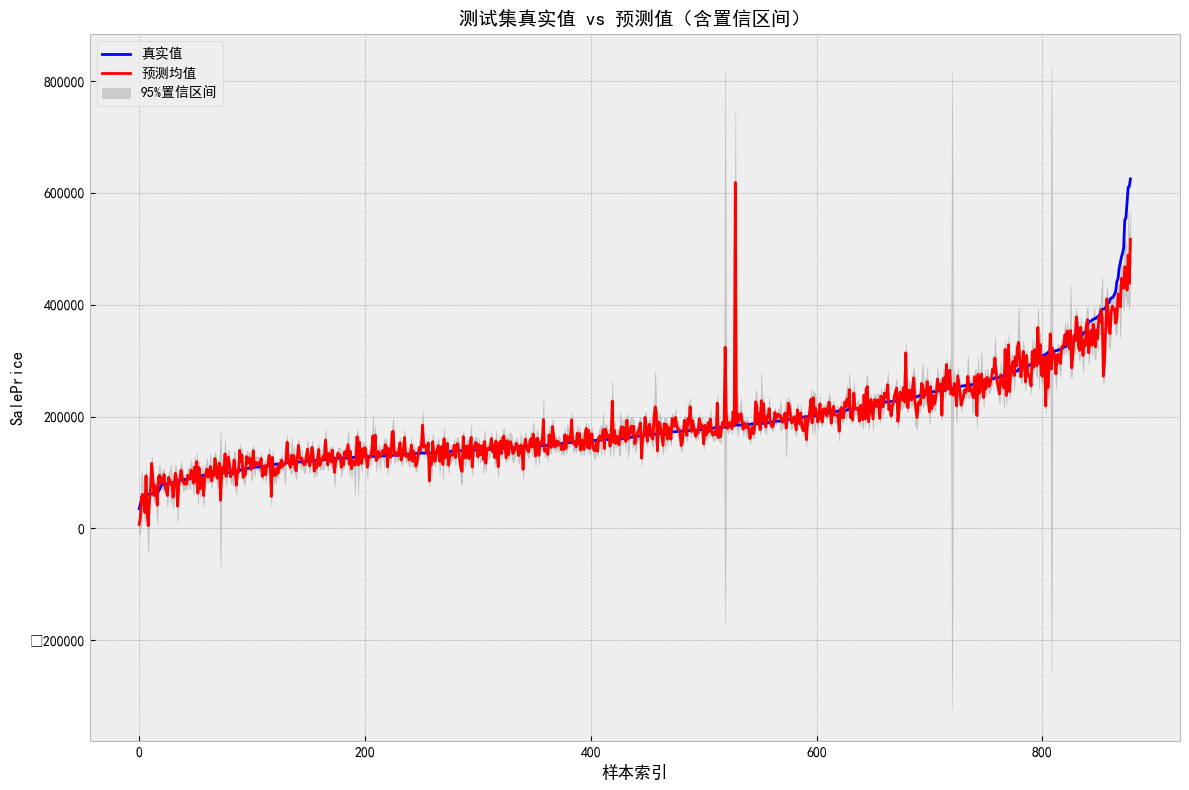

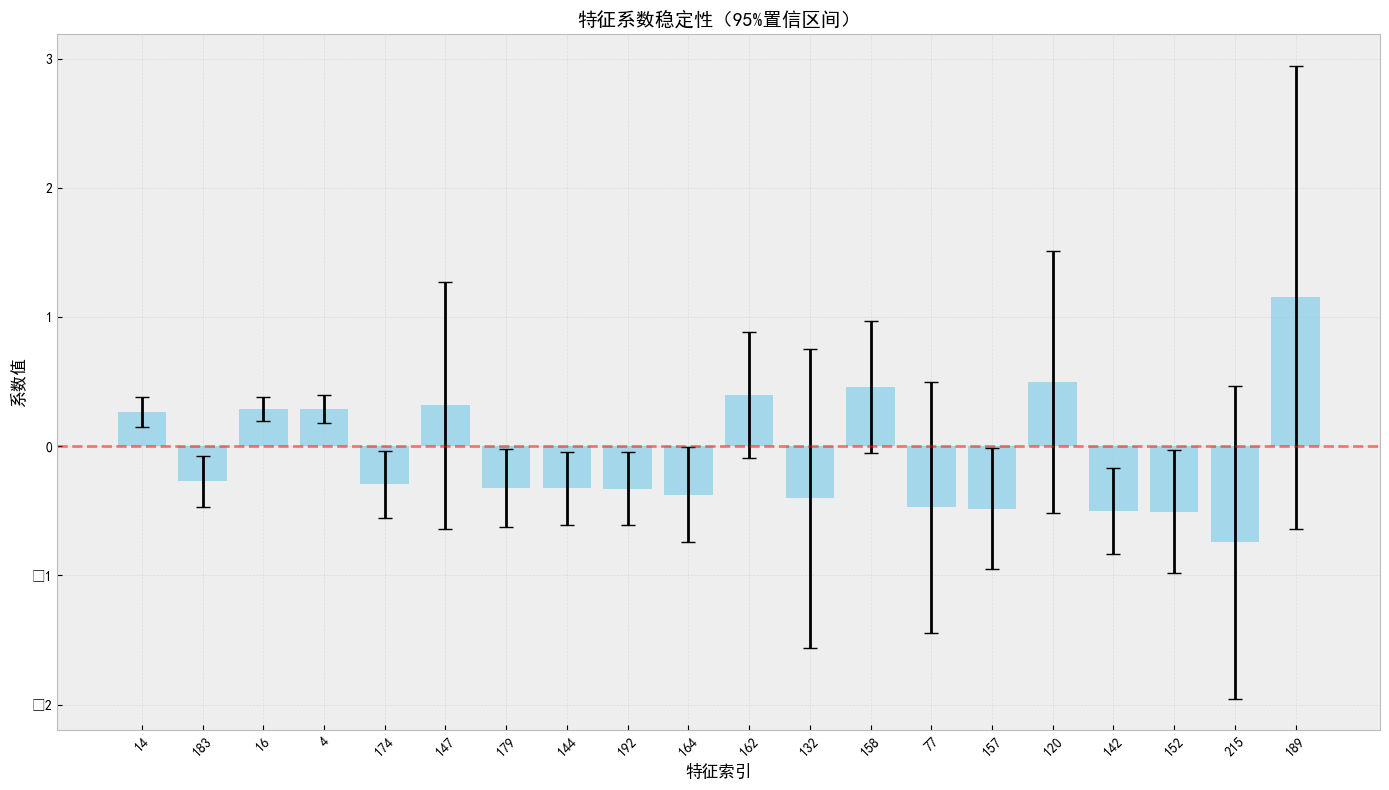

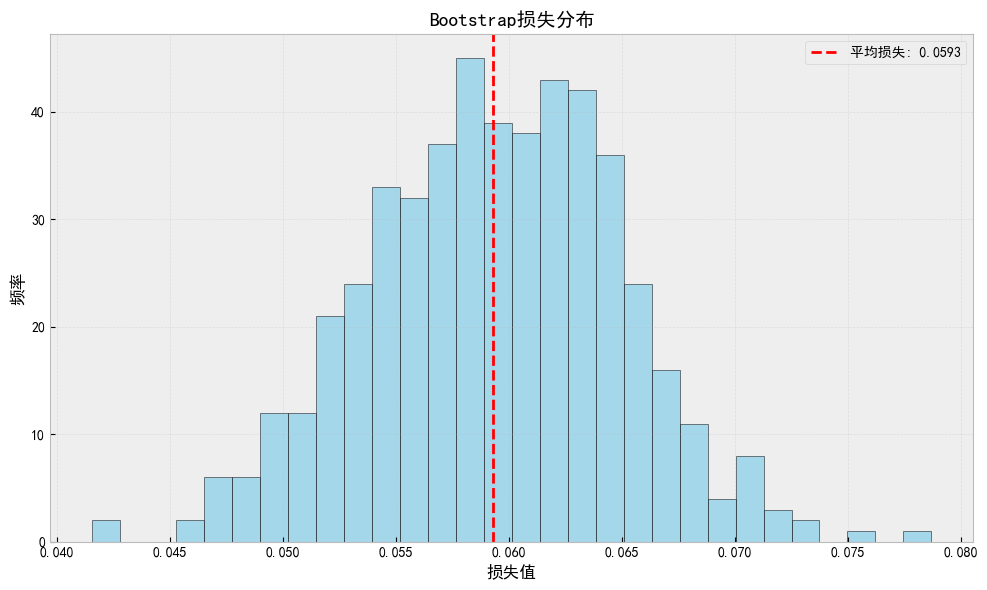

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample  # 导入重抽样函数


def bootstrap_train_and_predict(X_train, y_train, X_test, lambda_0, converge_limit_2, max_iter_outer, sigma, n_iterations=500):
    """
    执行Bootstrap重抽样训练和预测
    """
    # 存储每次Bootstrap的预测结果
    bootstrap_preds = []
    # 存储每次Bootstrap的系数
    bootstrap_coefs = []
    # 存储每次Bootstrap的损失值
    bootstrap_losses = []
    
    n_test = X_test.shape[0]
    n_features = X_train.shape[1]
    
    # 初始化预测结果数组
    y_pred_test_all = np.zeros((n_test, n_iterations))
    
    for i in range(n_iterations):
        print(f"正在进行Bootstrap迭代 {i+1}/{n_iterations}")
        
        # 1. 对训练集进行有放回的抽样（Bootstrap抽样）
        X_boot, y_boot = resample(X_train, y_train, replace=True, random_state=i)
        
        # 2. 标准化训练集的y值
        scaler_y = StandardScaler()
        y_boot_scaled = scaler_y.fit_transform(y_boot)
        
        # 3. 使用岭回归获取初始beta值
        ridge_model = Ridge(alpha=1)
        ridge_model.fit(X_boot, y_boot_scaled.ravel())
        beta = ridge_model.coef_.reshape(-1, 1)
        
        # 4. 创建优化器实例
        optimizer = interior_optimization(
            X_boot, y_boot_scaled, beta, lambda_0, converge_limit_2, max_iter_outer, sigma
        )
        
        # 5. 执行DFP优化
        final_beta = optimizer.DFP()
        
        # 6. 在测试集上进行预测
        y_pred_test_scaled = X_test @ final_beta
        y_pred_test_original = scaler_y.inverse_transform(y_pred_test_scaled)
        
        # 7. 存储结果
        bootstrap_preds.append(y_pred_test_original)
        bootstrap_coefs.append(final_beta.flatten())
        bootstrap_losses.append(optimizer.loss(final_beta))
        
        # 存储每次迭代的预测结果
        y_pred_test_all[:, i] = y_pred_test_original.flatten()
    
    # 计算每个测试样本的预测均值和标准差
    y_pred_mean = np.mean(y_pred_test_all, axis=1)
    y_pred_std = np.std(y_pred_test_all, axis=1)
    
    return {
        'y_pred_all': y_pred_test_all,
        'y_pred_mean': y_pred_mean,
        'y_pred_std': y_pred_std,
        'bootstrap_coefs': np.array(bootstrap_coefs),
        'bootstrap_losses': np.array(bootstrap_losses)
    }

def main():
    # 1. 加载数据
    data = pd.read_csv('D:/桌面/数据与代码/train1.csv')
    X_train = data.drop('SalePrice', axis=1).values
    y_train = data['SalePrice'].values.reshape(-1, 1)
    print(f"训练集样本数: {X_train.shape[0]}, 特征数: {X_train.shape[1]}")
    
    # 加载测试集数据
    test_data = pd.read_csv('D:/桌面/数据与代码/test1.csv')
    X_test = test_data.drop('SalePrice', axis=1).values
    y_test = test_data['SalePrice'].values.reshape(-1, 1)
    print(f"测试集样本数: {X_test.shape[0]}")
    
    # 2. 初始化参数
    lambda_0 = 0.00000001  # 正则化系数
    converge_limit_2 = 0.00001  # 收敛阈值
    max_iter_outer = 40  # 最大迭代次数
    sigma = 0.05  # L0近似的平滑参数
    n_bootstrap = 500  # Bootstrap重复次数
    
    # 3. 执行Bootstrap训练和预测
    bootstrap_results = bootstrap_train_and_predict(
        X_train, y_train, X_test, 
        lambda_0, converge_limit_2, max_iter_outer, sigma,
        n_iterations=n_bootstrap
    )
    
    # 4. 提取Bootstrap结果
    y_pred_all = bootstrap_results['y_pred_all']
    y_pred_mean = bootstrap_results['y_pred_mean']
    y_pred_std = bootstrap_results['y_pred_std']
    bootstrap_coefs = bootstrap_results['bootstrap_coefs']
    bootstrap_losses = bootstrap_results['bootstrap_losses']
    
    # 5. 计算整体性能指标
    test_mse = np.mean((y_test.flatten() - y_pred_mean)**2)
    test_mae = np.mean(np.abs(y_test.flatten() - y_pred_mean))
    
    print("\n=== Bootstrap测试集评估 ===")
    print(f"测试集MSE（原始尺度）: {test_mse:.6f}")
    print(f"测试集MAE（原始尺度）: {test_mae:.6f}")
    
    # 6. 可视化预测区间
    plt.figure(figsize=(12, 8))
    sorted_idx = np.argsort(y_test.flatten())
    y_test_sorted = y_test.flatten()[sorted_idx]
    y_pred_mean_sorted = y_pred_mean[sorted_idx]
    y_pred_std_sorted = y_pred_std[sorted_idx]
    
    plt.plot(y_test_sorted, 'b-', label='真实值')
    plt.plot(y_pred_mean_sorted, 'r-', label='预测均值')
    plt.fill_between(
        range(len(y_test_sorted)), 
        y_pred_mean_sorted - 1.96 * y_pred_std_sorted,
        y_pred_mean_sorted + 1.96 * y_pred_std_sorted,
        color='gray', alpha=0.3, label='95%置信区间'
    )
    plt.title("测试集真实值 vs 预测值（含置信区间）", fontsize=14)
    plt.xlabel("样本索引", fontsize=12)
    plt.ylabel("SalePrice", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # 7. 可视化特征系数的稳定性
    coef_means = np.mean(bootstrap_coefs, axis=0)
    coef_stds = np.std(bootstrap_coefs, axis=0)
    
    # 只显示系数绝对值较大的前20个特征
    significant_idx = np.argsort(np.abs(coef_means))[-20:]
    
    plt.figure(figsize=(14, 8))
    plt.bar(range(len(significant_idx)), coef_means[significant_idx], 
            yerr=1.96*coef_stds[significant_idx], 
            alpha=0.7, capsize=5, color='skyblue')
    plt.axhline(0, color='red', linestyle='--', alpha=0.5)
    plt.title("特征系数稳定性（95%置信区间）", fontsize=14)
    plt.xlabel("特征索引", fontsize=12)
    plt.ylabel("系数值", fontsize=12)
    plt.xticks(range(len(significant_idx)), significant_idx, rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 8. 可视化损失分布
    plt.figure(figsize=(10, 6))
    plt.hist(bootstrap_losses, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(np.mean(bootstrap_losses), color='red', linestyle='dashed', linewidth=2, 
                label=f'平均损失: {np.mean(bootstrap_losses):.4f}')
    plt.title("Bootstrap损失分布", fontsize=14)
    plt.xlabel("损失值", fontsize=12)
    plt.ylabel("频率", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()